<a href="https://www.kaggle.com/code/aniruddhapa/house-price-prediction-using-advanced-regression?scriptVersionId=161638309" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

# House Price Prediction : Advanced Regression

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
pd.options.display.max_columns = None
pd.options.display.max_rows = None
import warnings
warnings.filterwarnings("ignore")
import datetime
from sklearn.preprocessing import OneHotEncoder , OrdinalEncoder
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import MinMaxScaler

In [2]:
import pandas as pd
df_train=pd.read_csv('/kaggle/input/house-prices-advanced-regression-techniques/train.csv')
df_train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,NaN,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,NaN,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [3]:
df_train.shape

(1460, 81)

In [4]:
df_test=pd.read_csv('/kaggle/input/house-prices-advanced-regression-techniques/test.csv')
df_test.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Feedr,Norm,1Fam,1Story,5,6,1961,1961,Gable,CompShg,VinylSd,VinylSd,NaN,0.0,TA,TA,CBlock,TA,TA,No,Rec,468.0,LwQ,144.0,270.0,882.0,GasA,TA,Y,SBrkr,896,0,0,896,0.0,0.0,1,0,2,1,TA,5,Typ,0,NaN,Attchd,1961.0,Unf,1.0,730.0,TA,TA,Y,140,0,0,0,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,6,6,1958,1958,Hip,CompShg,Wd Sdng,Wd Sdng,BrkFace,108.0,TA,TA,CBlock,TA,TA,No,ALQ,923.0,Unf,0.0,406.0,1329.0,GasA,TA,Y,SBrkr,1329,0,0,1329,0.0,0.0,1,1,3,1,Gd,6,Typ,0,NaN,Attchd,1958.0,Unf,1.0,312.0,TA,TA,Y,393,36,0,0,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,5,5,1997,1998,Gable,CompShg,VinylSd,VinylSd,NaN,0.0,TA,TA,PConc,Gd,TA,No,GLQ,791.0,Unf,0.0,137.0,928.0,GasA,Gd,Y,SBrkr,928,701,0,1629,0.0,0.0,2,1,3,1,TA,6,Typ,1,TA,Attchd,1997.0,Fin,2.0,482.0,TA,TA,Y,212,34,0,0,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,6,6,1998,1998,Gable,CompShg,VinylSd,VinylSd,BrkFace,20.0,TA,TA,PConc,TA,TA,No,GLQ,602.0,Unf,0.0,324.0,926.0,GasA,Ex,Y,SBrkr,926,678,0,1604,0.0,0.0,2,1,3,1,Gd,7,Typ,1,Gd,Attchd,1998.0,Fin,2.0,470.0,TA,TA,Y,360,36,0,0,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,Inside,Gtl,StoneBr,Norm,Norm,TwnhsE,1Story,8,5,1992,1992,Gable,CompShg,HdBoard,HdBoard,NaN,0.0,Gd,TA,PConc,Gd,TA,No,ALQ,263.0,Unf,0.0,1017.0,1280.0,GasA,Ex,Y,SBrkr,1280,0,0,1280,0.0,0.0,2,0,2,1,Gd,5,Typ,0,NaN,Attchd,1992.0,RFn,2.0,506.0,TA,TA,Y,0,82,0,0,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


In [5]:
df_test.shape

(1459, 80)

In [6]:
pd.set_option('display.max_columns', 2500)

In [7]:
pd.set_option('display.max_rows', 2500)

# Calculate and display the percentage of missing values in each column of Train and Test sets.

In [8]:
null = df_train.isnull().sum()
null_percentage = (null/len(df_train))*100
null_percentage[null_percentage > 0 ].sort_values(ascending=False)

PoolQC          99.520548
MiscFeature     96.301370
Alley           93.767123
Fence           80.753425
MasVnrType      59.726027
FireplaceQu     47.260274
LotFrontage     17.739726
GarageType       5.547945
GarageYrBlt      5.547945
GarageFinish     5.547945
GarageQual       5.547945
GarageCond       5.547945
BsmtFinType2     2.602740
BsmtExposure     2.602740
BsmtFinType1     2.534247
BsmtCond         2.534247
BsmtQual         2.534247
MasVnrArea       0.547945
Electrical       0.068493
dtype: float64

In [9]:
null = df_test.isnull().sum()
null_percentage = (null/len(df_test))*100
null_percentage[null_percentage > 0 ].sort_values(ascending=False)

PoolQC          99.794380
MiscFeature     96.504455
Alley           92.666210
Fence           80.123372
MasVnrType      61.274846
FireplaceQu     50.034270
LotFrontage     15.558602
GarageCond       5.346127
GarageYrBlt      5.346127
GarageQual       5.346127
GarageFinish     5.346127
GarageType       5.209047
BsmtCond         3.084304
BsmtExposure     3.015764
BsmtQual         3.015764
BsmtFinType1     2.878684
BsmtFinType2     2.878684
MasVnrArea       1.028101
MSZoning         0.274160
BsmtFullBath     0.137080
BsmtHalfBath     0.137080
Functional       0.137080
Utilities        0.137080
GarageCars       0.068540
GarageArea       0.068540
TotalBsmtSF      0.068540
KitchenQual      0.068540
BsmtUnfSF        0.068540
BsmtFinSF2       0.068540
BsmtFinSF1       0.068540
Exterior2nd      0.068540
Exterior1st      0.068540
SaleType         0.068540
dtype: float64

In [10]:
df = df_train.drop(columns=["Id"])
test1 = df_test.drop(columns=["Id"])

# Addressing NULL Values: 
Null values are represented with actual values based on domain knowledge of House Price Sales. For example, if Garage value is null, lets assume Garage not available for that property and fill the value as 'No Garage', rather than deleting rows.

In [11]:
df["PoolQC"] = df["PoolQC"].fillna("NoPool")
test1["PoolQC"] = test1["PoolQC"].fillna("NoPool")

df['Alley'] = df['Alley'].fillna("NoAlley")
test1['Alley'] = test1['Alley'].fillna("NoAlley")


df['MiscFeature'] = df['MiscFeature'].fillna("Missing")
test1['MiscFeature'] = test1['MiscFeature'].fillna("Missing")

df['Fence'] = df['Fence'].fillna("NoFence")
test1['Fence'] = test1['Fence'].fillna("NoFence")

df['MasVnrType'] = df['MasVnrType'].fillna("Missing")
test1['MasVnrType'] = test1['MasVnrType'].fillna("Missing")

df['FireplaceQu'] = df['FireplaceQu'].fillna("NoFireplace")
test1['FireplaceQu'] = test1['FireplaceQu'].fillna("NoFireplace")



df['GarageType'] = df['GarageType'].fillna('No Garage')
df['GarageFinish'] = df['GarageFinish'].fillna('No Garage')
df['GarageQual'] = df['GarageQual'].fillna('No Garage')
df['GarageCond'] = df['GarageCond'].fillna('No Garage')

test1['GarageType'] = test1['GarageType'].fillna('No Garage')
test1['GarageFinish'] = test1['GarageFinish'].fillna('No Garage')
test1['GarageQual'] = test1['GarageQual'].fillna('No Garage')
test1['GarageCond'] = test1['GarageCond'].fillna('No Garage')


df['LotFrontage'] = df['LotFrontage'].fillna(df['LotFrontage'].mean())
test1['LotFrontage'] = test1['LotFrontage'].fillna(test1['LotFrontage'].mean())


df['GarageYrBlt'] = df['GarageYrBlt'].fillna(0)  
test1['GarageYrBlt'] = test1['GarageYrBlt'].fillna(0) 


df['BsmtQual'] = df['BsmtQual'].fillna('No Basement')
df['BsmtCond'] = df['BsmtCond'].fillna('No Basement')
df['BsmtExposure'] = df['BsmtExposure'].fillna('No Basement')
df['BsmtFinType1'] = df['BsmtFinType1'].fillna('No Basement')
df['BsmtFinType2'] = df['BsmtFinType2'].fillna('No Basement')

test1['BsmtQual'] = test1['BsmtQual'].fillna('No Basement')
test1['BsmtCond'] = test1['BsmtCond'].fillna('No Basement')
test1['BsmtExposure'] = test1['BsmtExposure'].fillna('No Basement')
test1['BsmtFinType1'] = test1['BsmtFinType1'].fillna('No Basement')
test1['BsmtFinType2'] = test1['BsmtFinType2'].fillna('No Basement')


df['MasVnrArea'] = df['MasVnrArea'].fillna(df['MasVnrArea'].mean() ) 
test1['MasVnrArea'] = test1['MasVnrArea'].fillna(test1['MasVnrArea'].mean() ) 

df['Electrical'] =df['Electrical'].fillna('Missing')
test1['Electrical'] =test1['Electrical'].fillna('Missing')


test1['MSZoning'].fillna('RL',inplace=True) 

test1['Utilities'].fillna('AllPub', inplace=True)

test1['Exterior1st'].fillna('VinylSd' , inplace=True)
test1['Exterior2nd'].fillna('VinylSd',inplace=True)

test1['BsmtFullBath'].fillna(0 ,inplace=True)
test1['BsmtHalfBath'].fillna(0 , inplace=True)
test1['KitchenQual'].fillna('TA',inplace=True)
test1['Functional'].fillna('Typ' ,inplace=True)
test1['SaleType'].fillna('WD' ,inplace=True)
test1['GarageCars'].fillna(2,inplace=True) 


test1['BsmtFinSF1'].fillna(test1['BsmtFinSF1'].mean(),inplace=True) 
test1['BsmtFinSF2'].fillna(test1['BsmtFinSF2'].mean(),inplace=True) 
test1['BsmtUnfSF'].fillna(test1['BsmtUnfSF'].mean(),inplace=True) 
test1['TotalBsmtSF'].fillna(test1['TotalBsmtSF'].mean(),inplace=True) 
test1['GarageArea'].fillna(test1['GarageArea'].mean(),inplace=True) 


In [12]:
df1 = df.drop(columns=['SalePrice'])

In [13]:
df1 = df1.drop(columns=['Alley','LandContour' ,'LotConfig' , 'LandSlope' ,
                         'BldgType','RoofStyle','Heating' ,'Functional','MiscFeature'])
test1 = test1.drop(columns= ['Alley','LandContour' ,'LotConfig' , 'LandSlope' ,
                         'BldgType','RoofStyle','Heating' ,'Functional','MiscFeature'])

In [14]:
numerical_columns = df1.select_dtypes(include=['int64', 'float64']).columns
categorical_columns = df.select_dtypes(include=['object', 'category']).columns

In [15]:
numerical_columns

Index(['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond',
       'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2',
       'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces',
       'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal',
       'MoSold', 'YrSold'],
      dtype='object')

In [16]:
categorical_columns

Index(['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual',
       'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature',
       'SaleType', 'SaleCondition'],
      dtype='object')

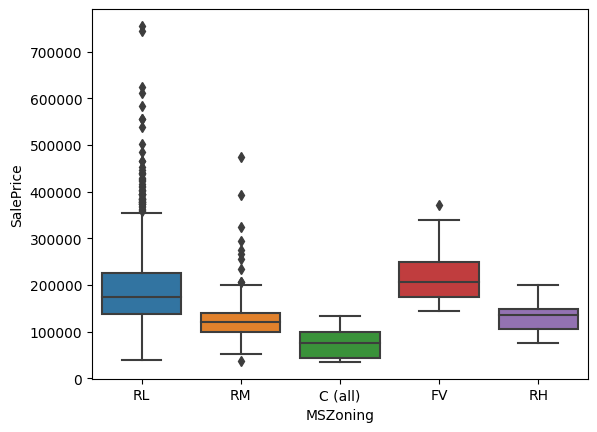

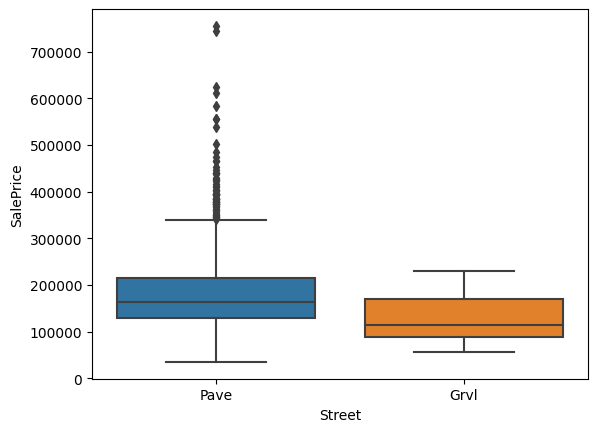

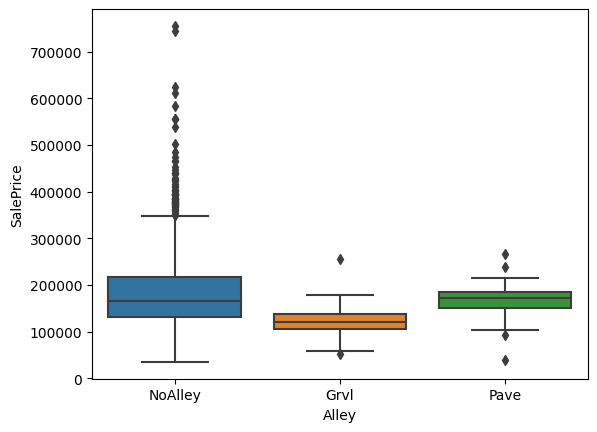

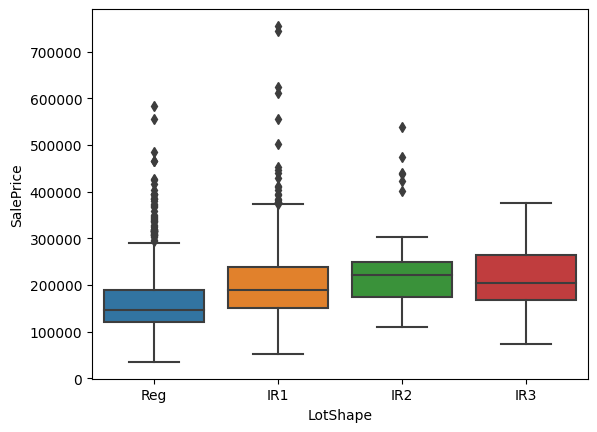

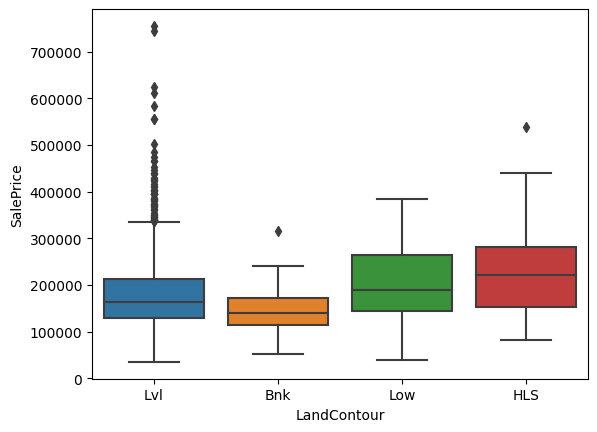

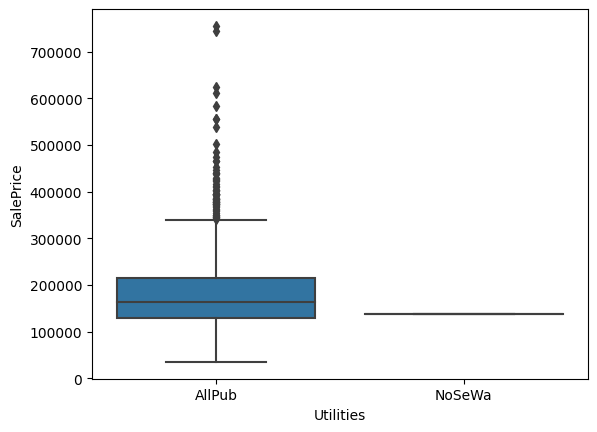

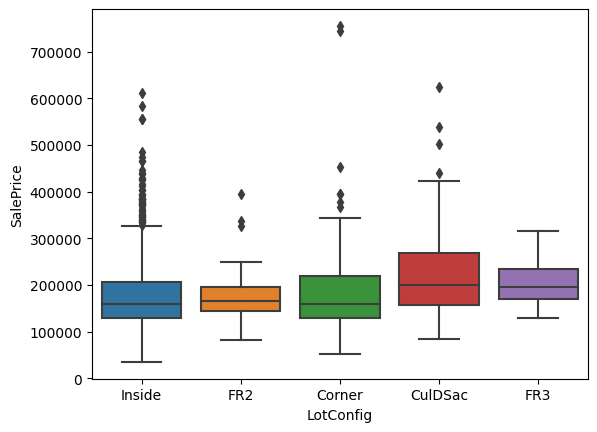

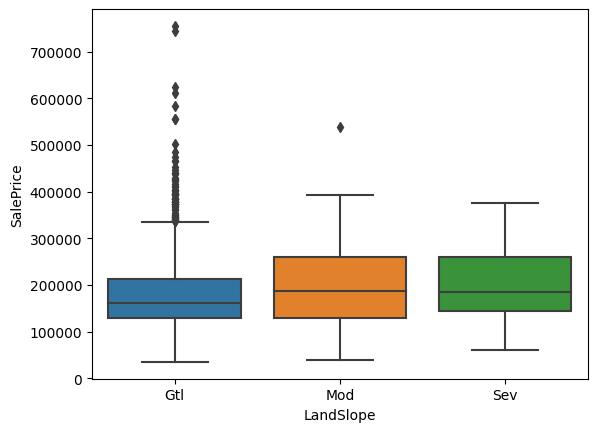

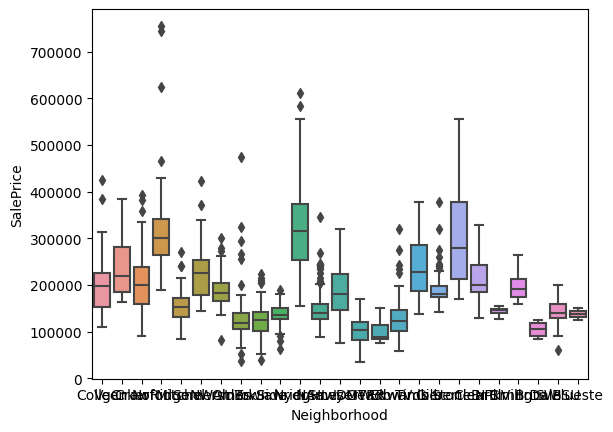

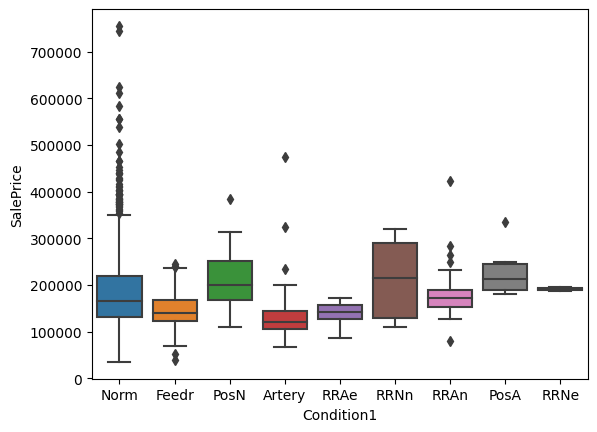

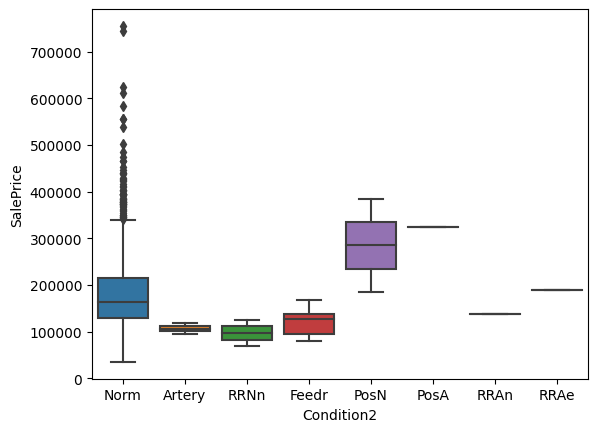

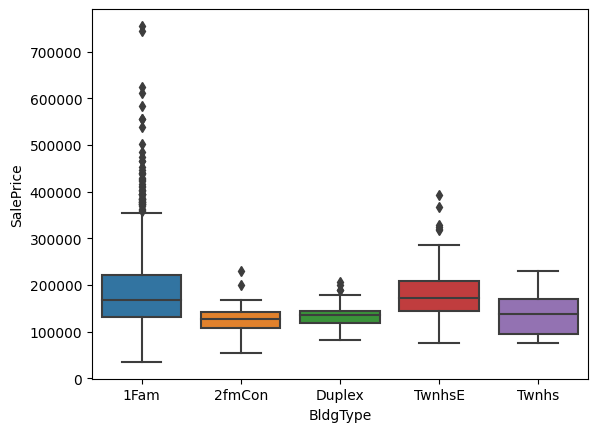

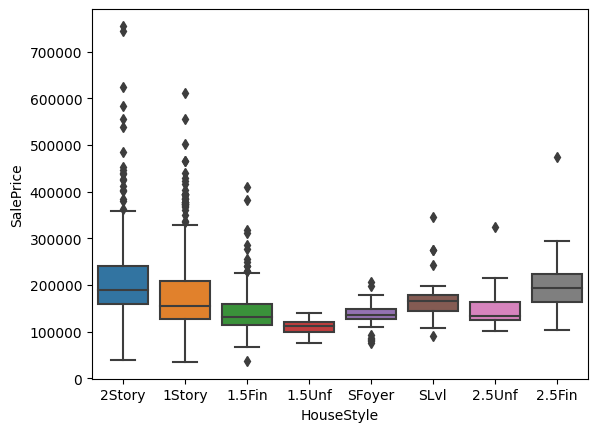

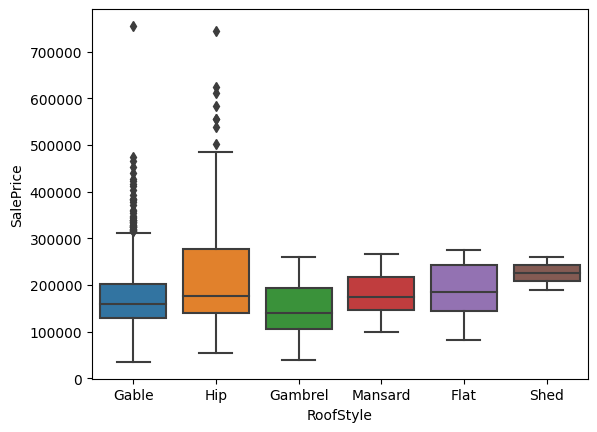

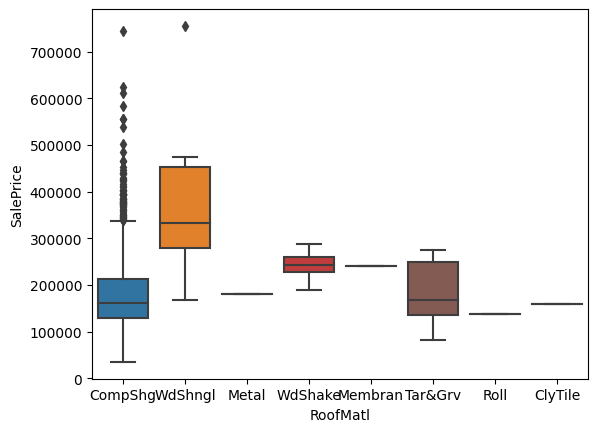

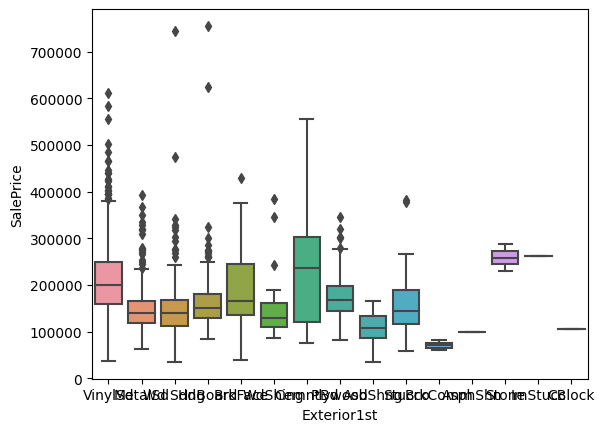

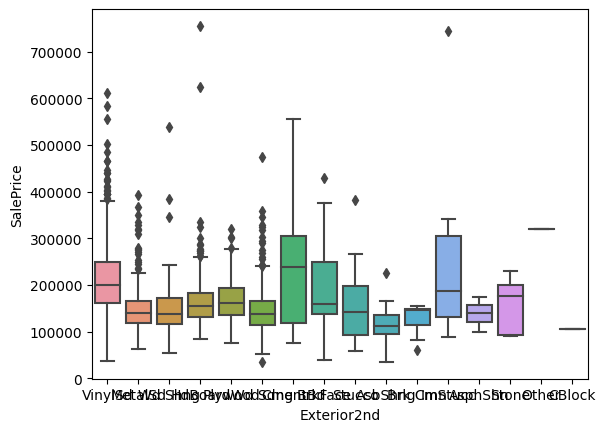

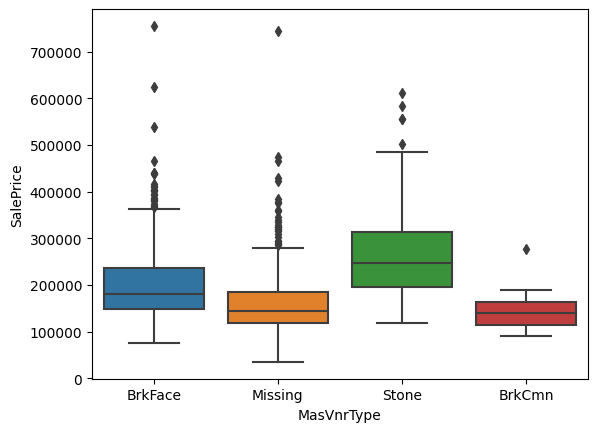

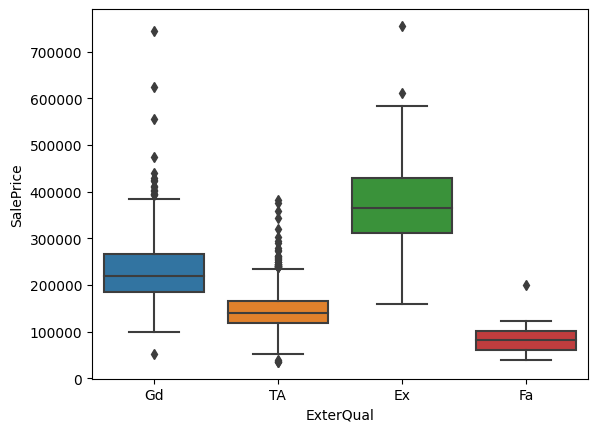

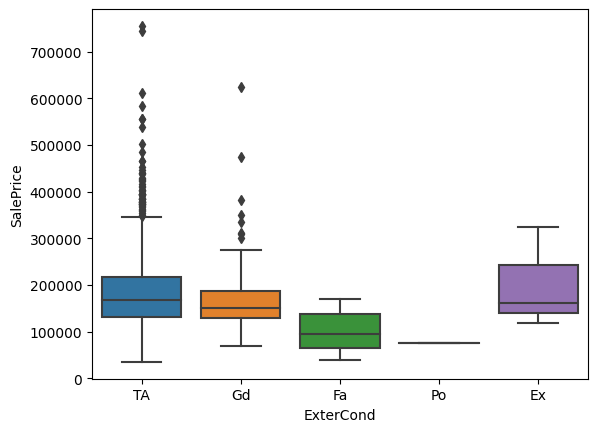

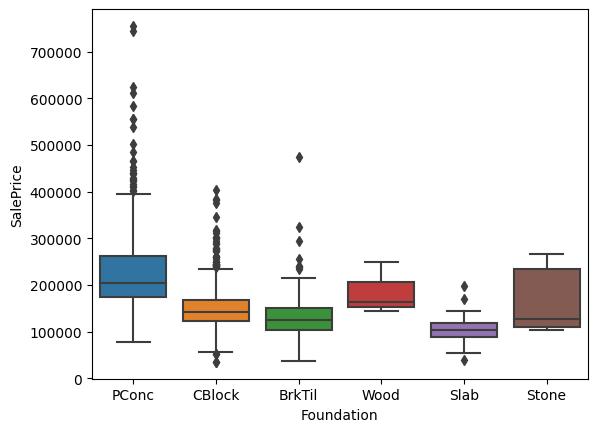

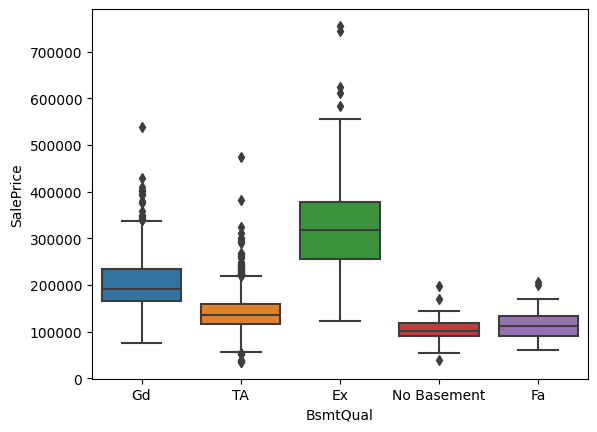

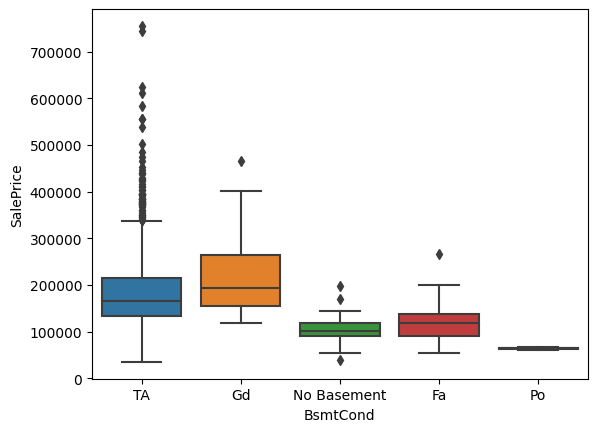

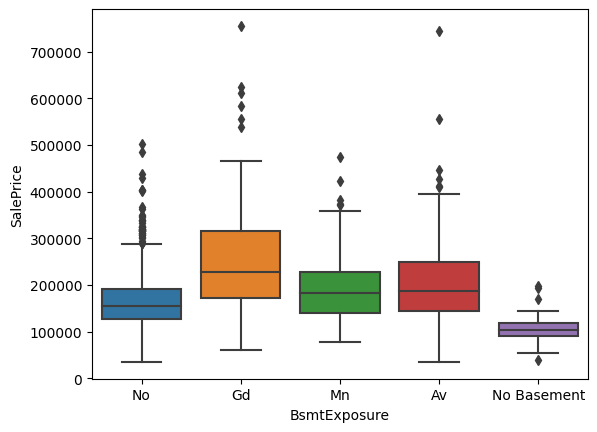

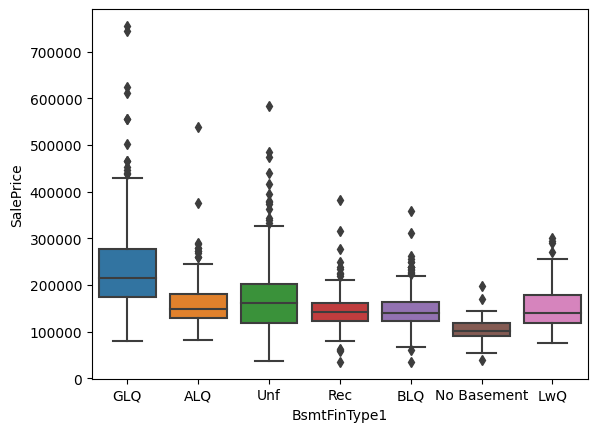

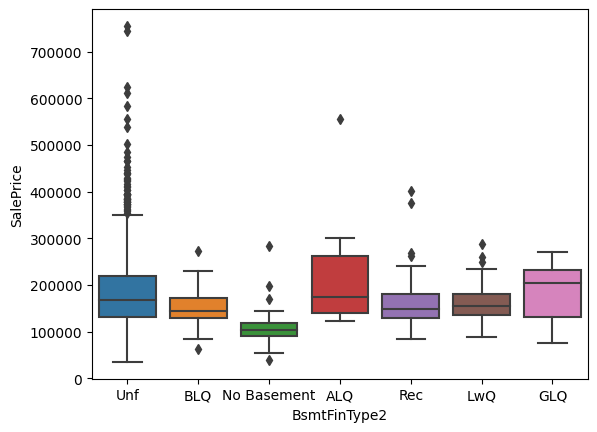

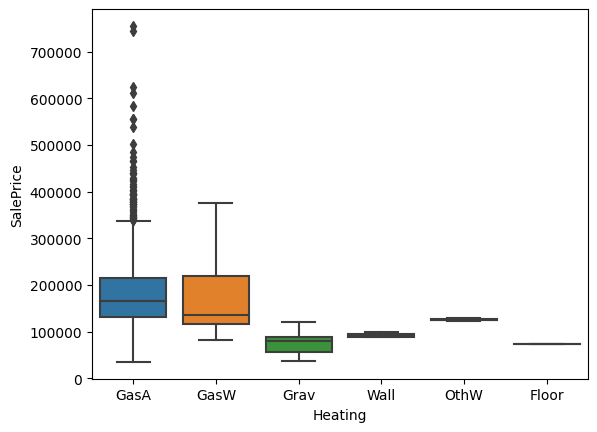

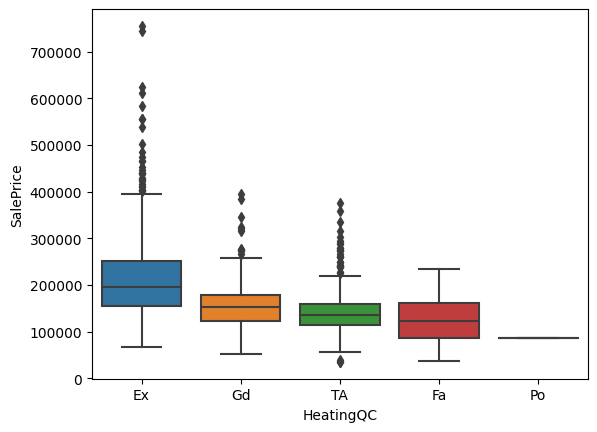

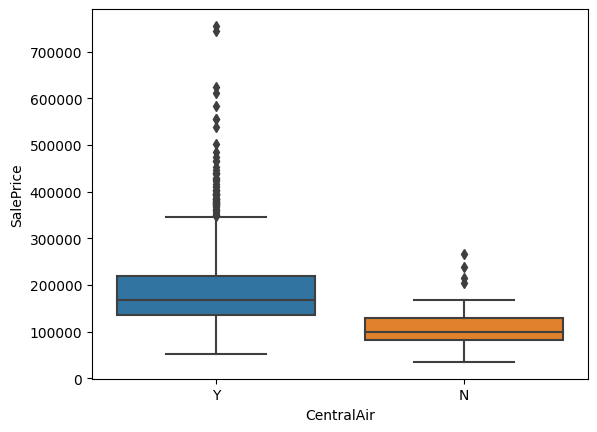

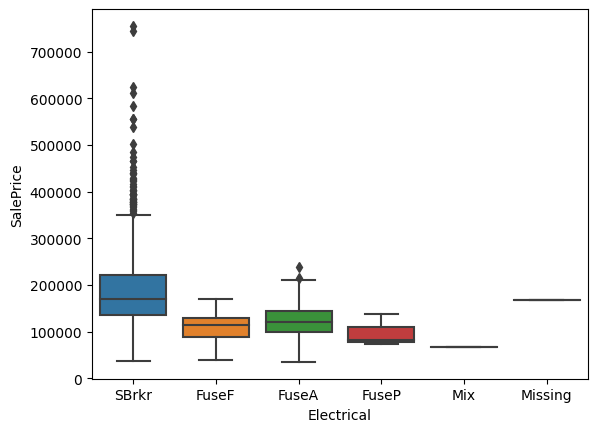

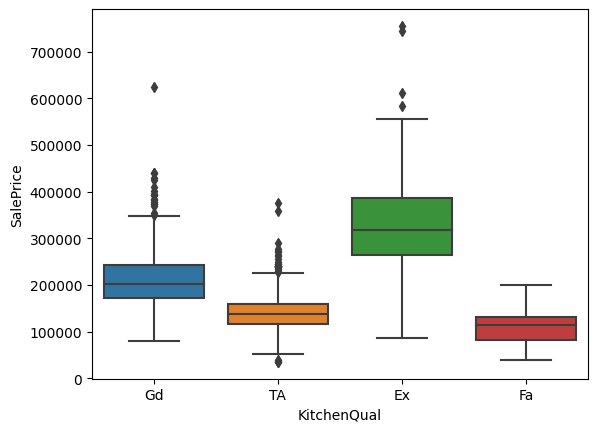

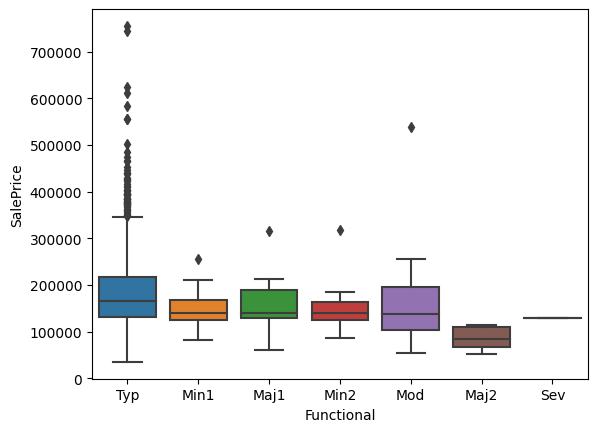

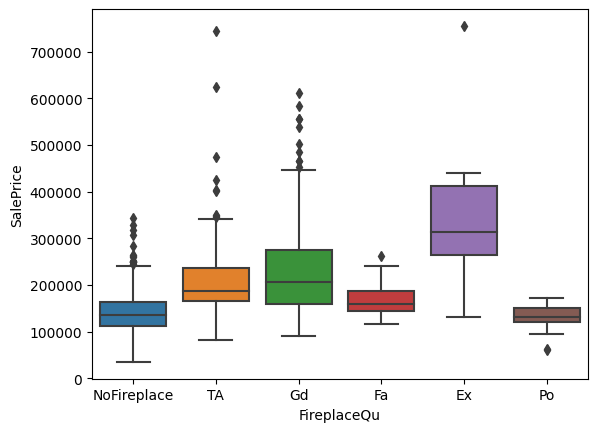

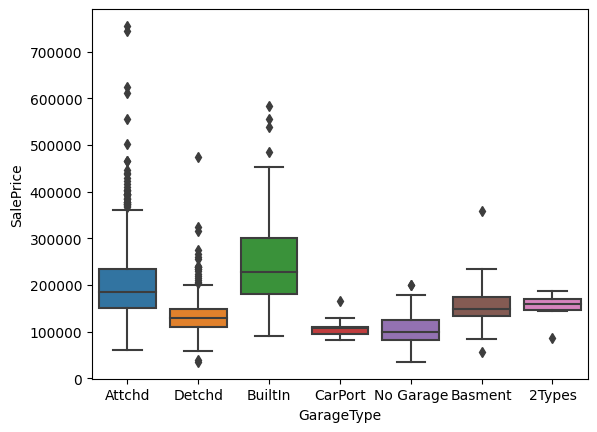

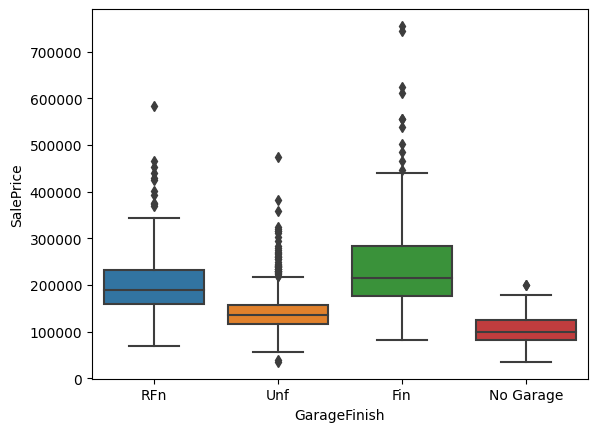

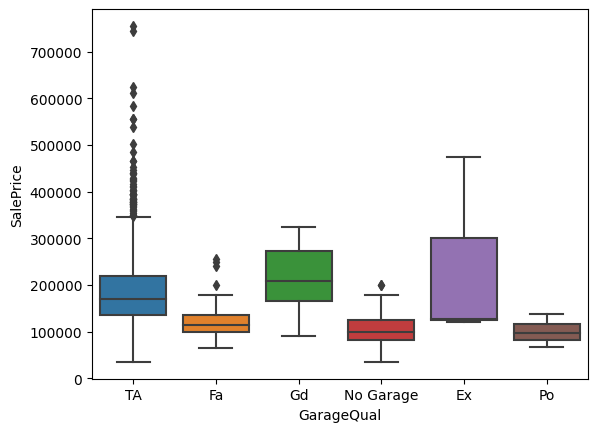

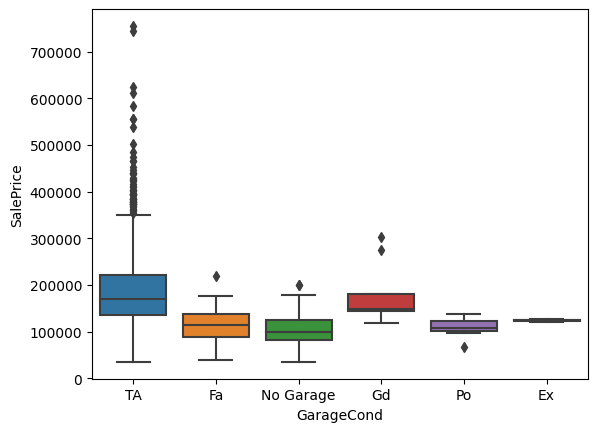

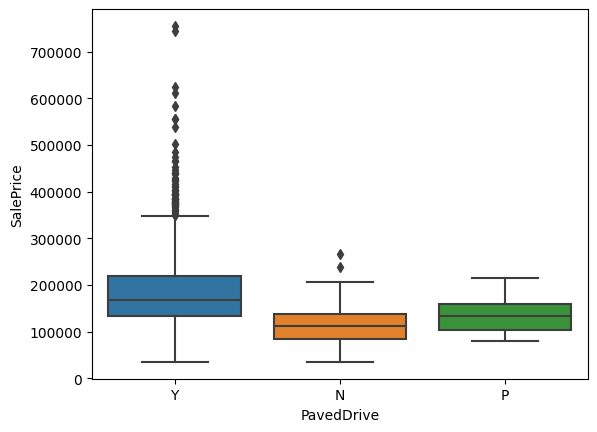

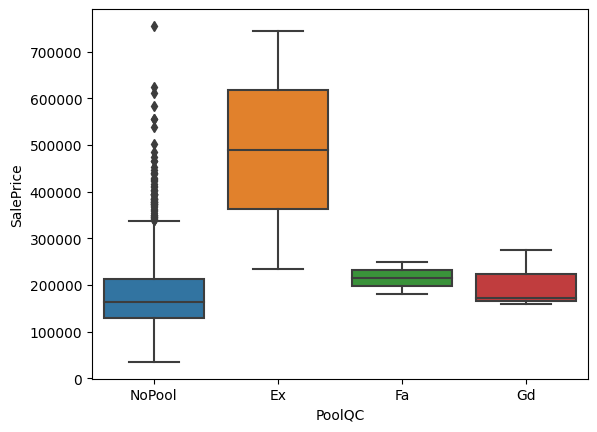

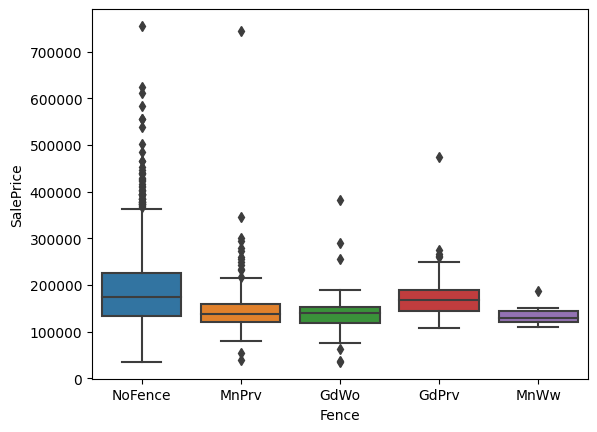

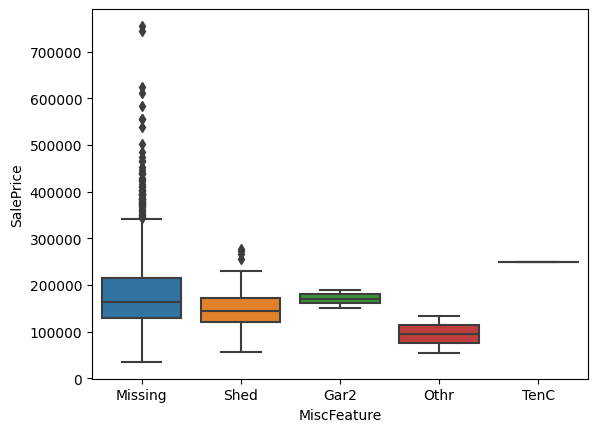

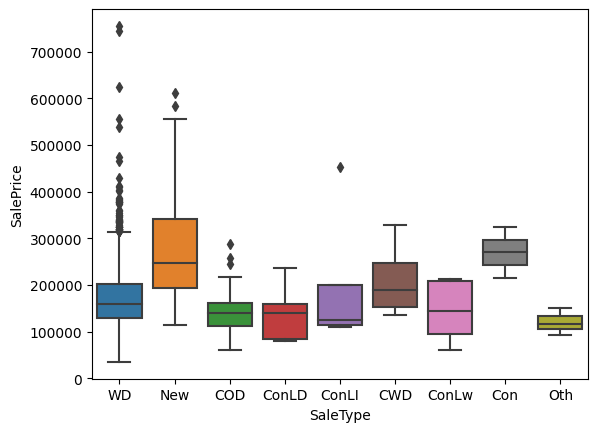

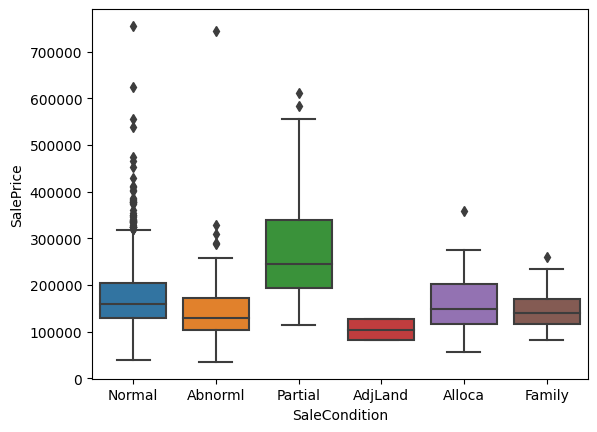

In [17]:
for i in categorical_columns:
    sns.boxplot(data=df , x=i , y='SalePrice')
    plt.show()

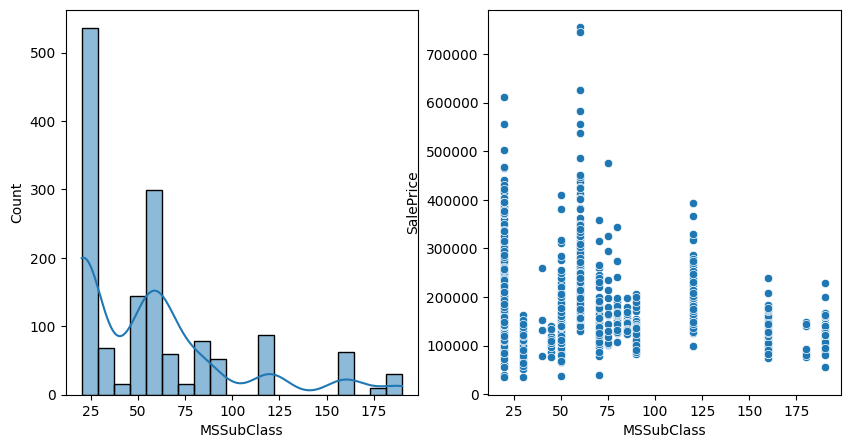

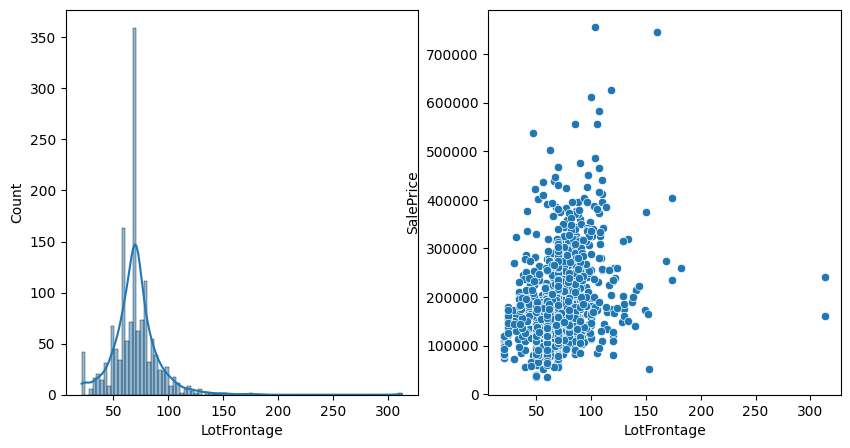

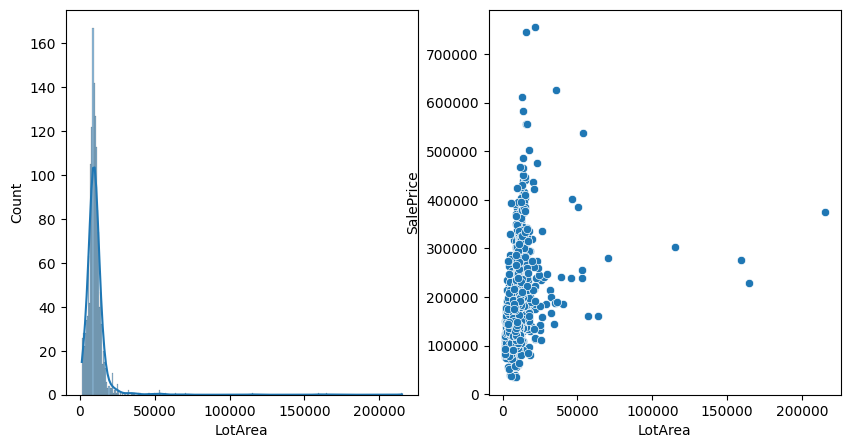

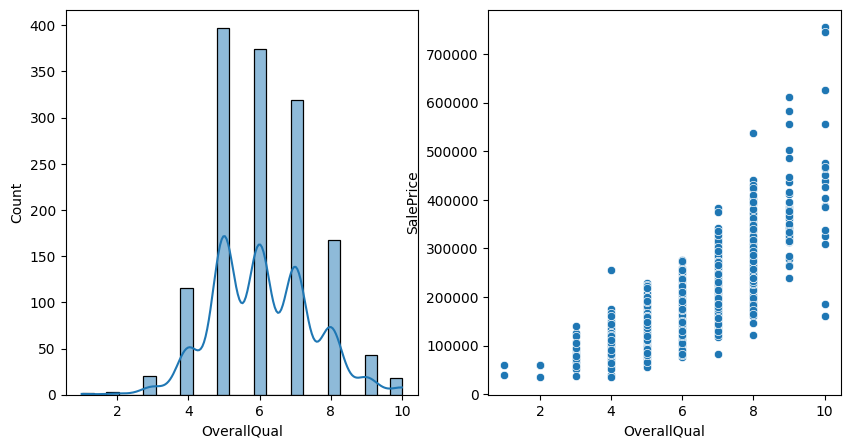

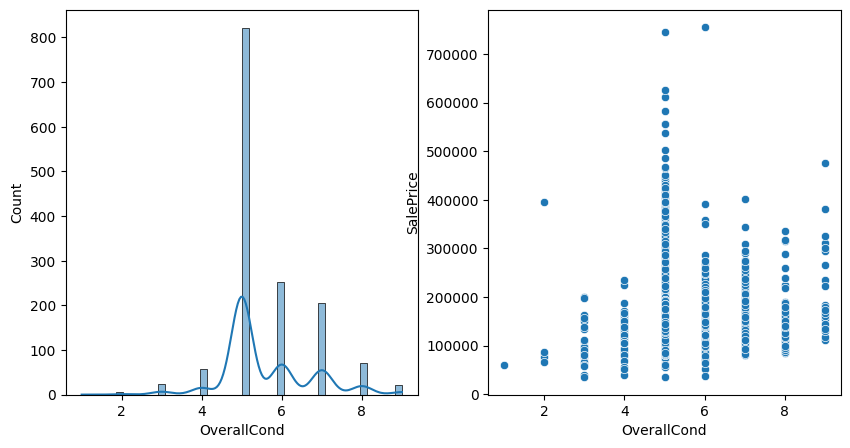

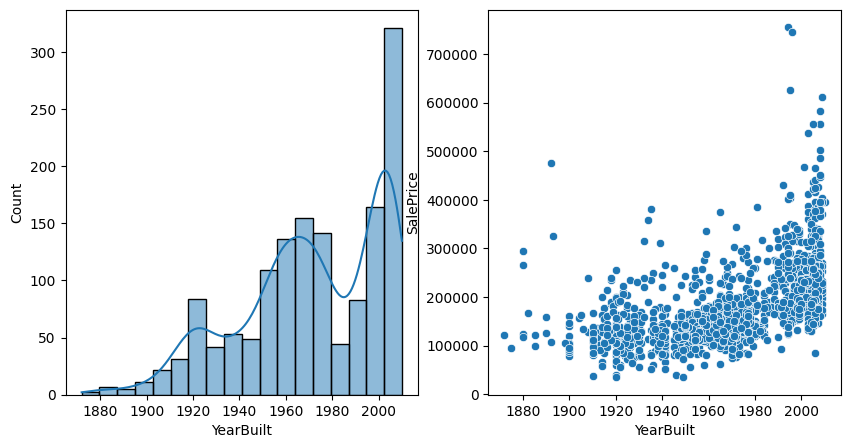

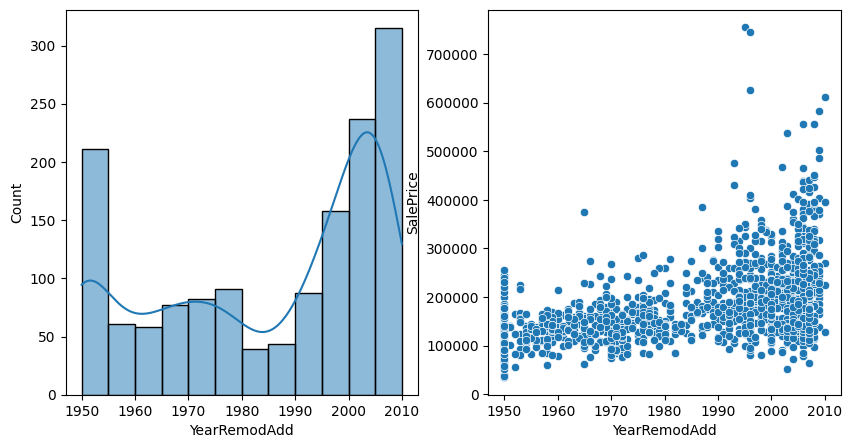

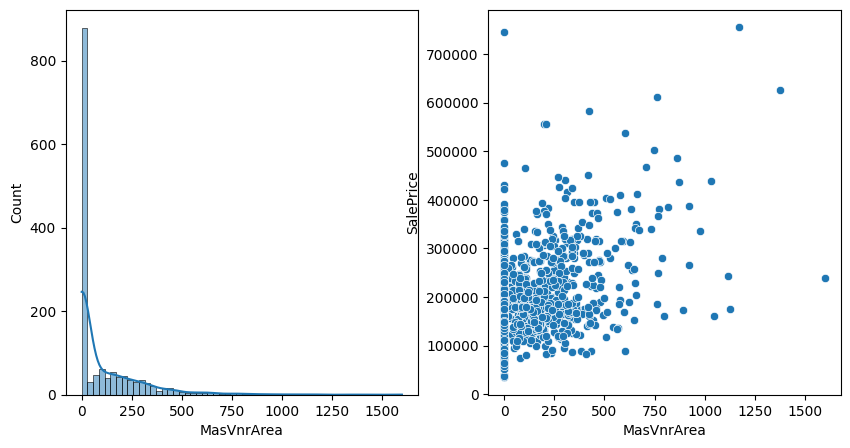

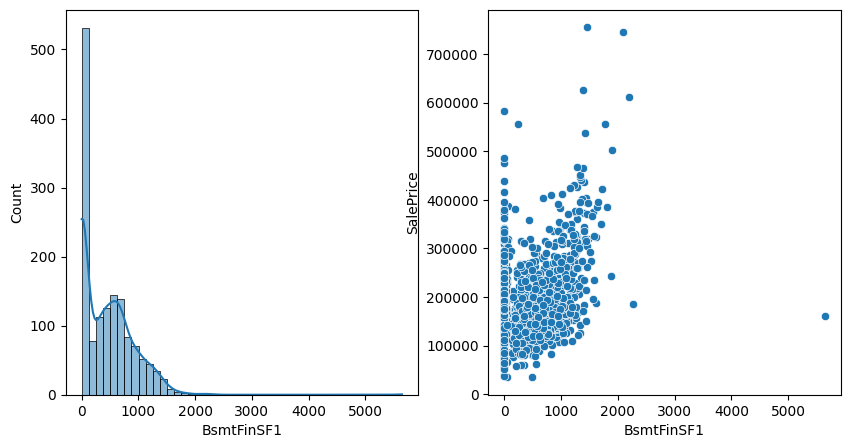

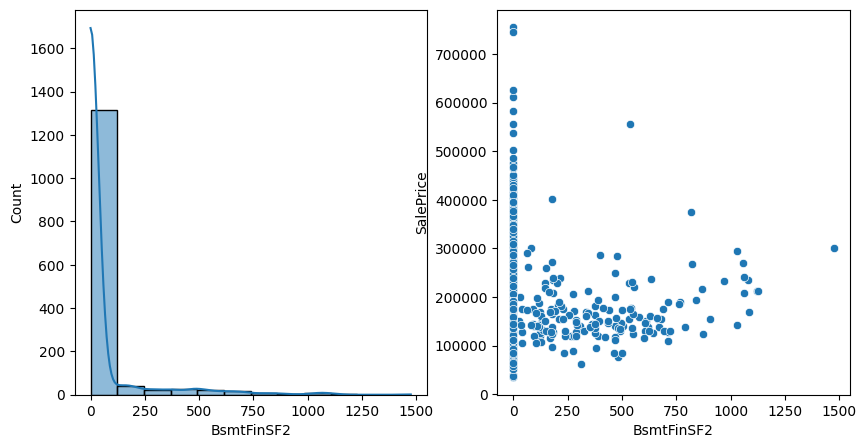

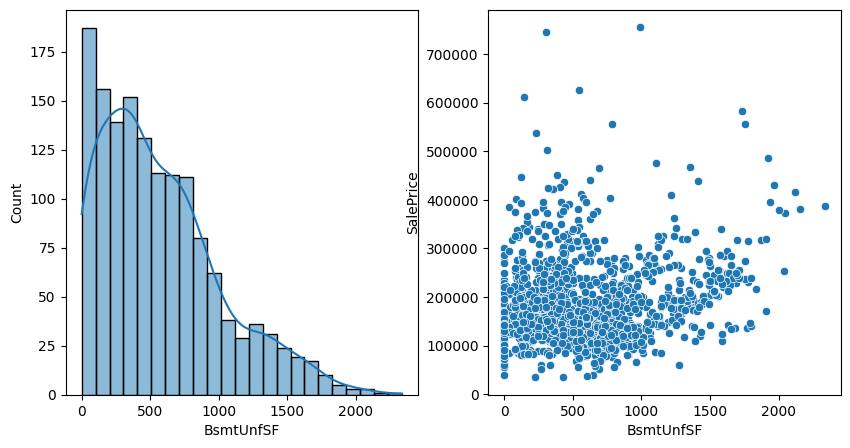

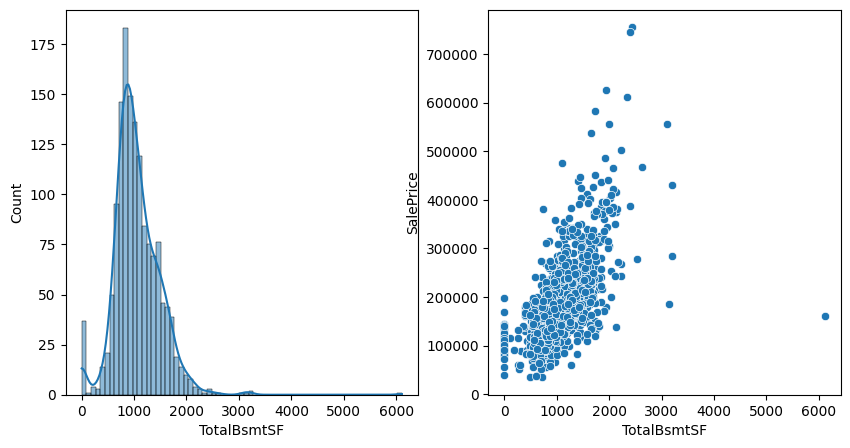

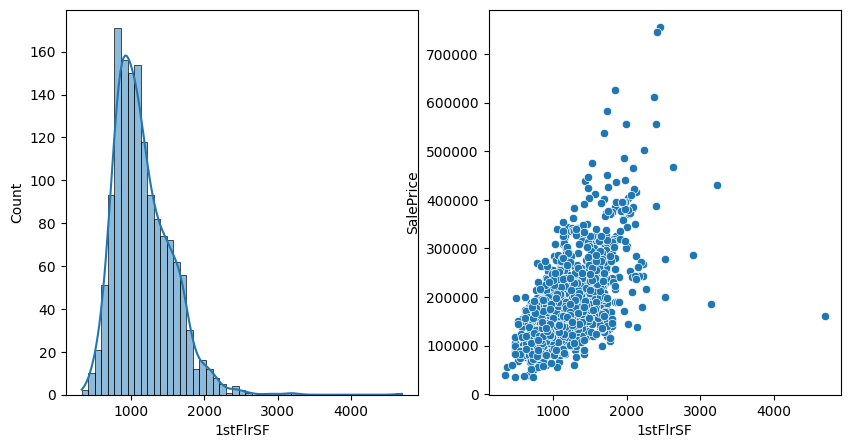

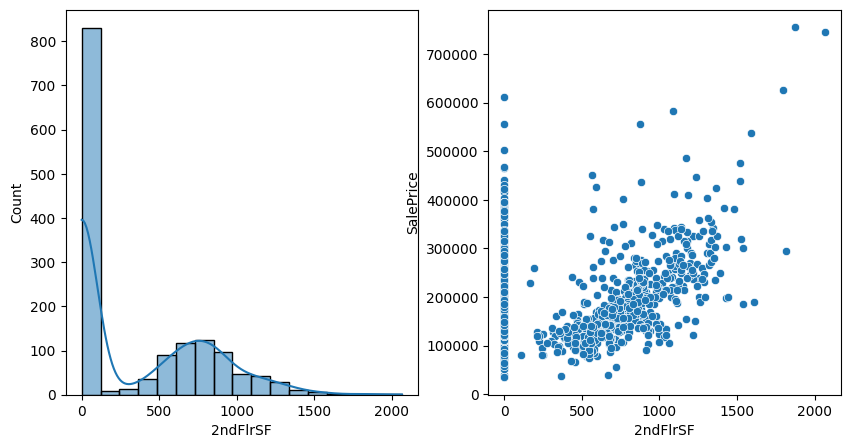

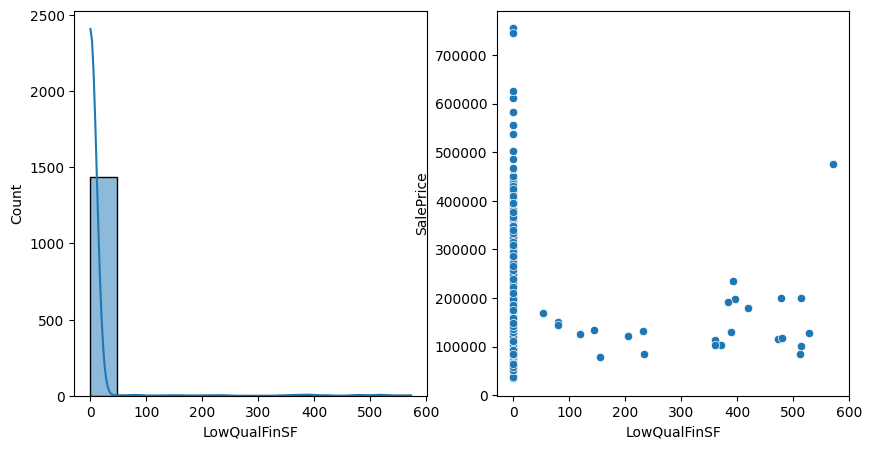

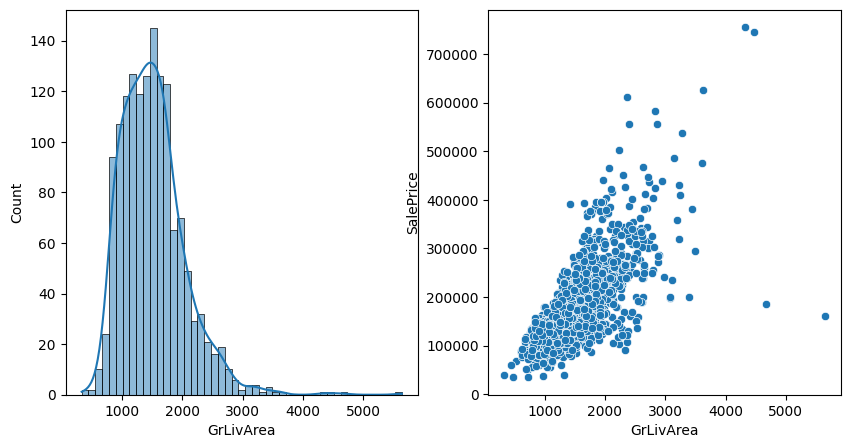

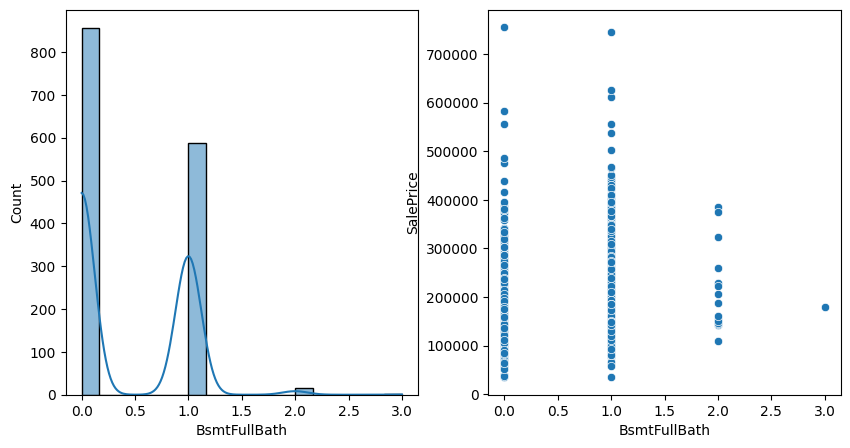

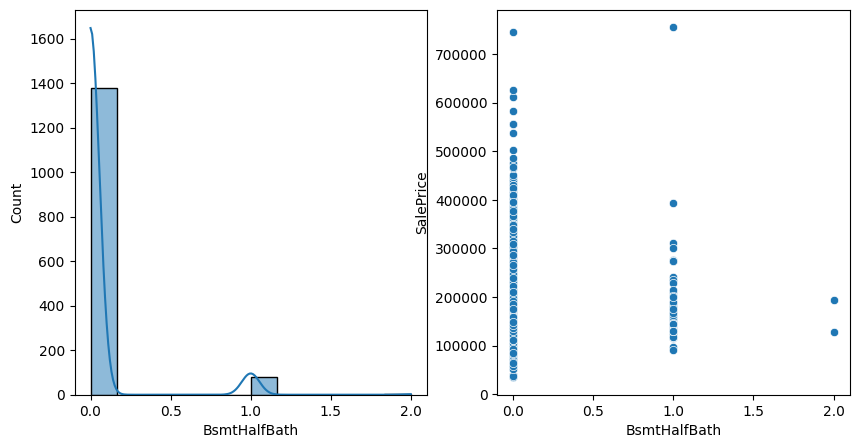

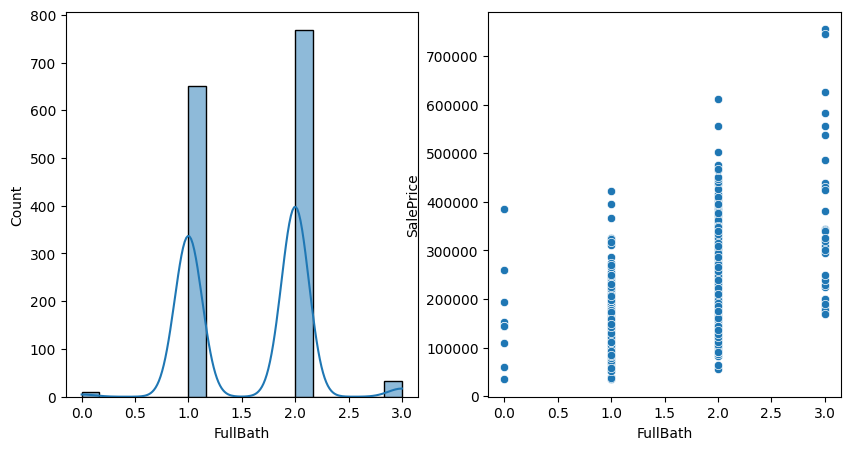

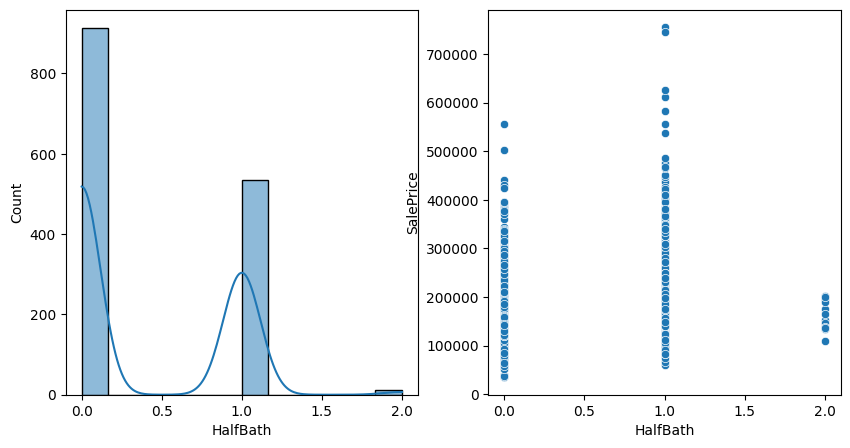

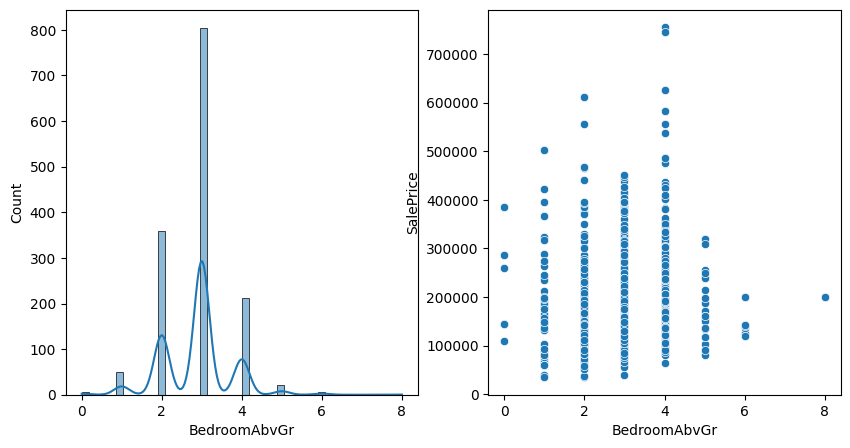

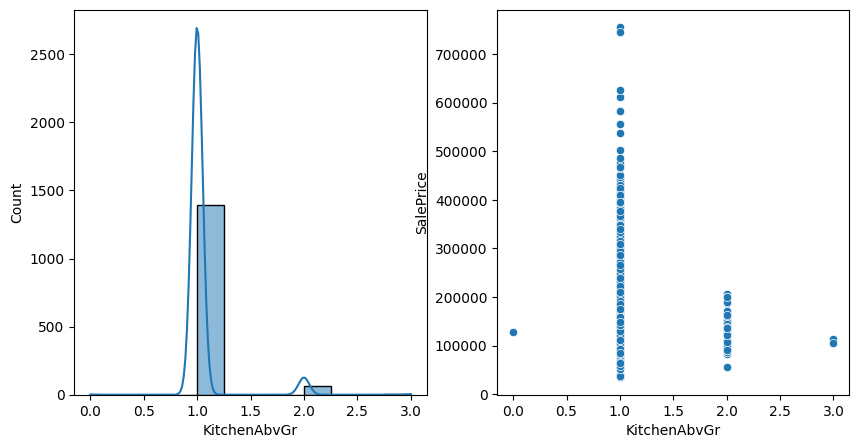

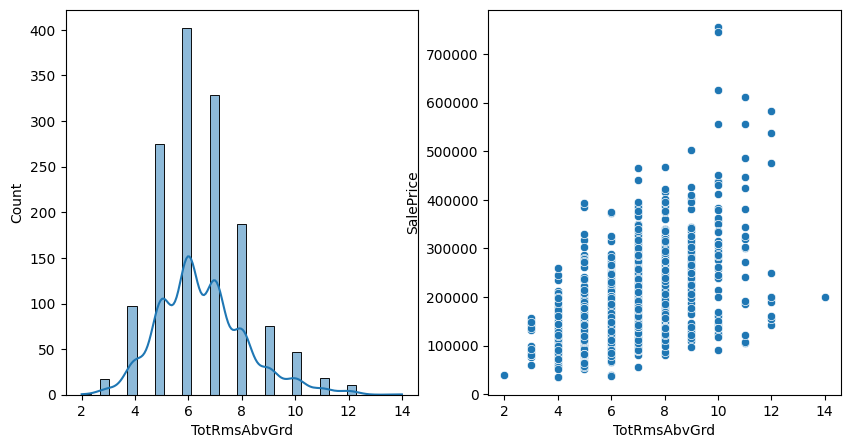

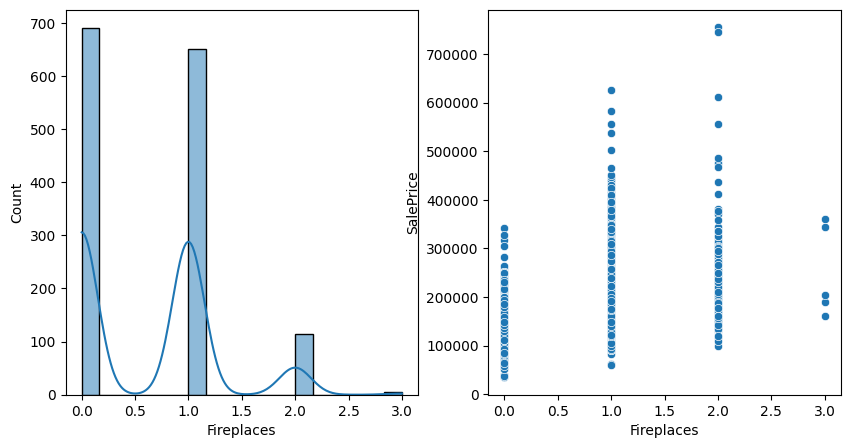

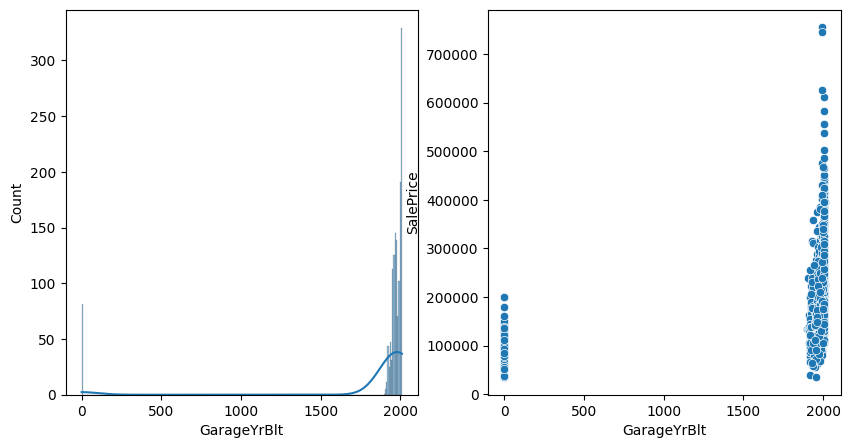

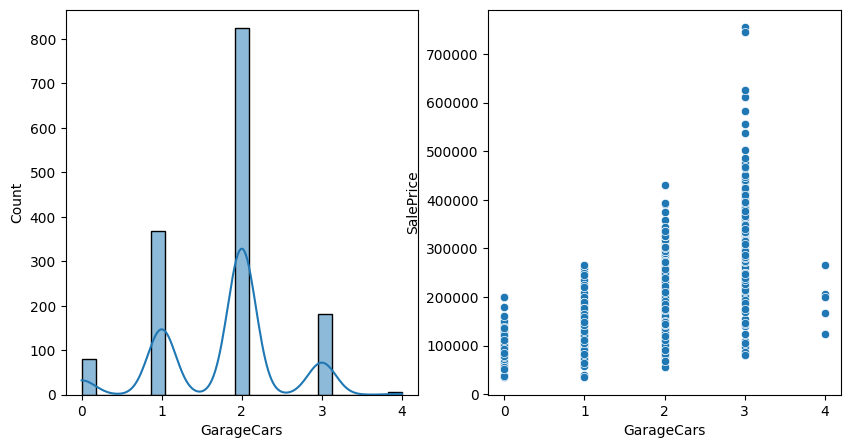

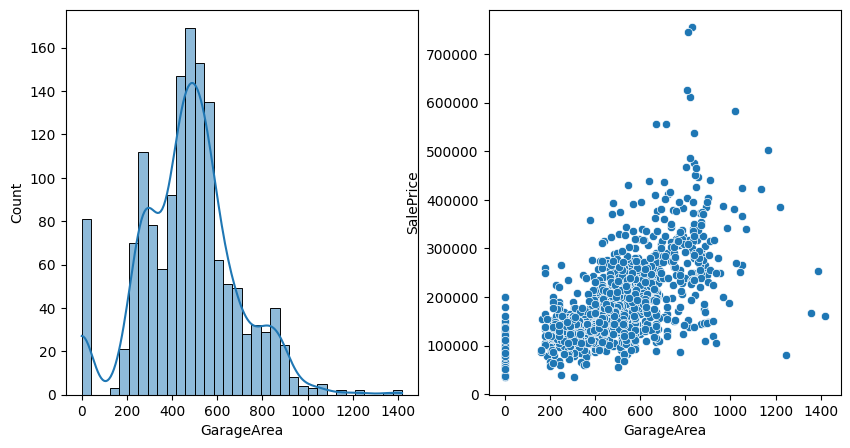

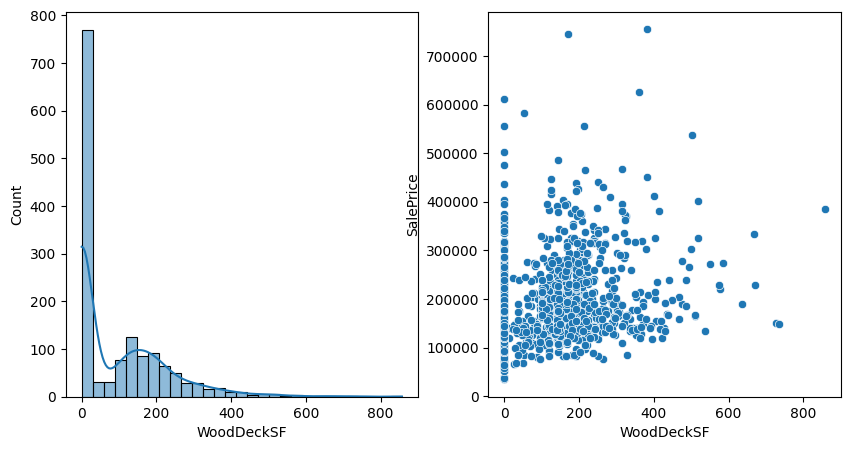

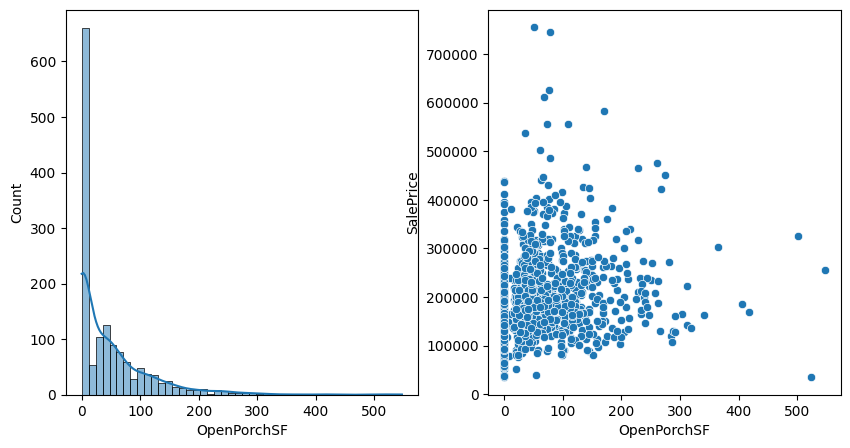

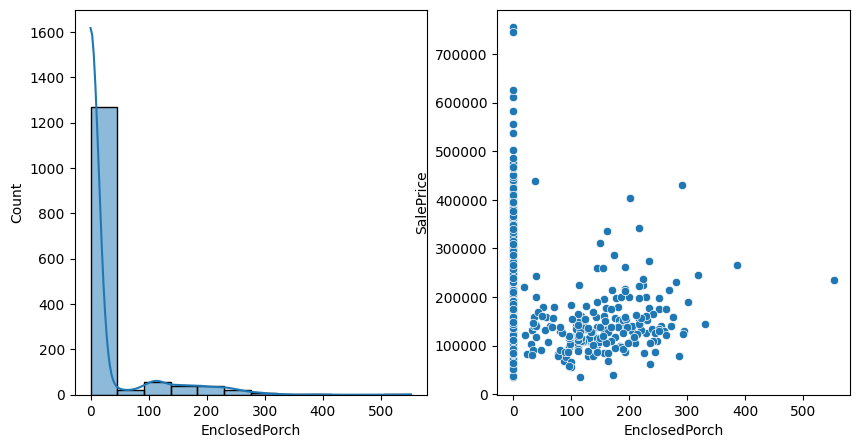

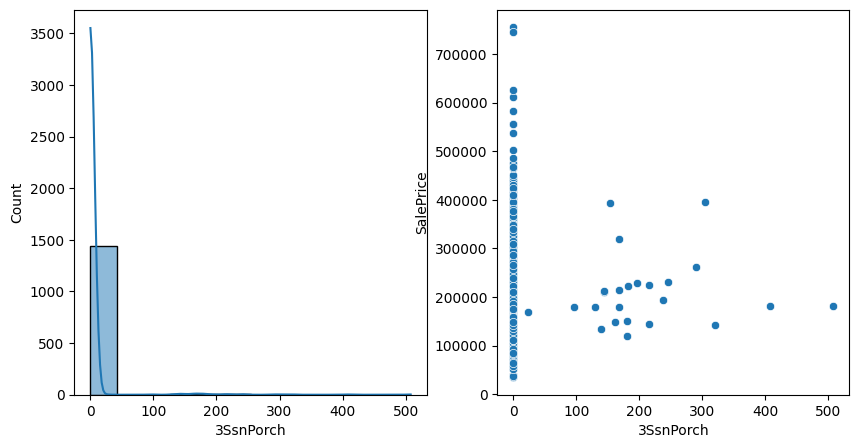

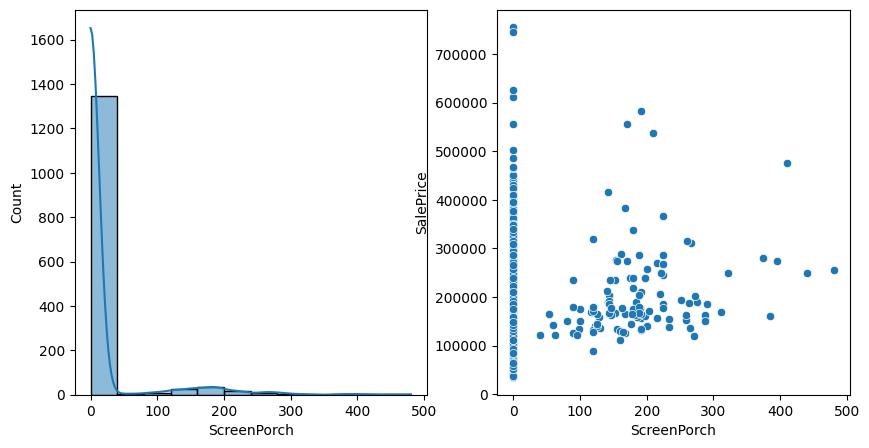

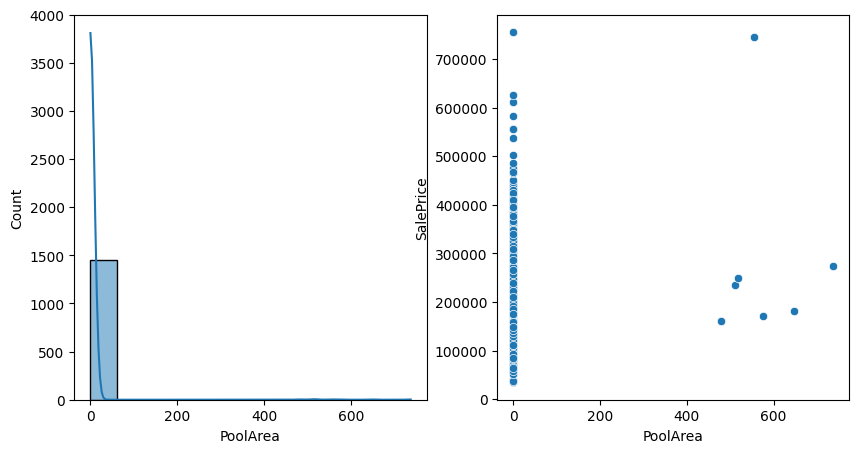

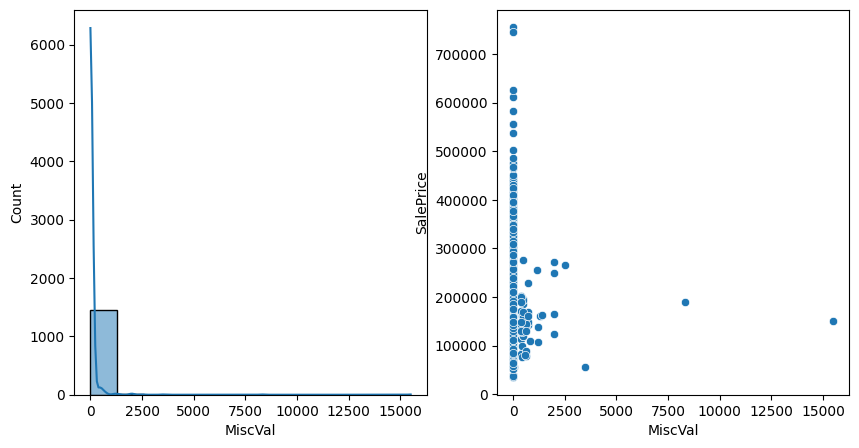

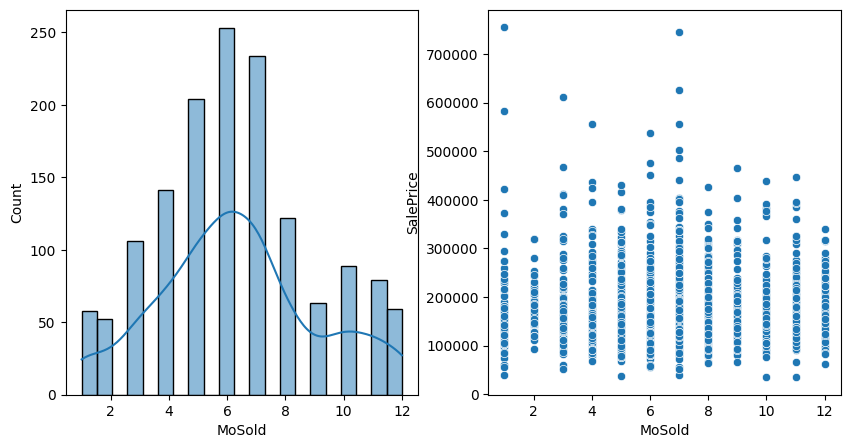

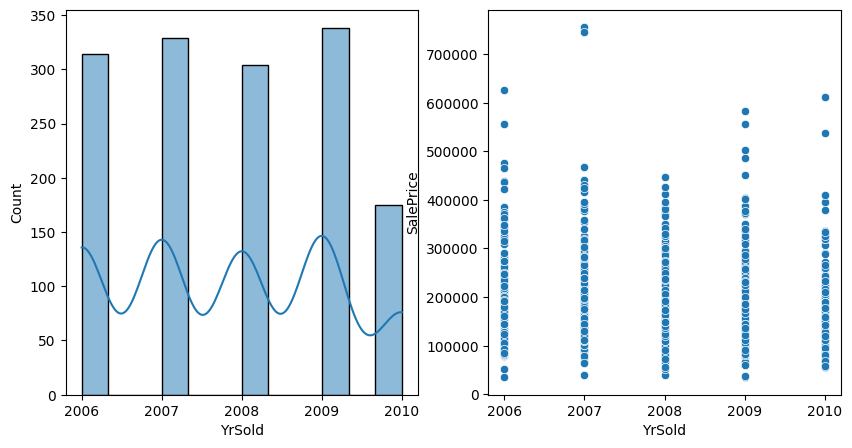

In [18]:
for i in numerical_columns:
    plt.figure(figsize=(10,5))
    plt.subplot(1,2,1)
    sns.histplot(data = df , x = i ,kde = True)
    plt.subplot(1,2,2)
    sns.scatterplot(x=df[i] ,y = df["SalePrice"])
    plt.show()

# Log Transformation of relevant features

Log transformation is typically applied to data that exhibits right-skewness, meaning that the right tail of the distribution is longer than the left tail. It is particularly useful for dealing with data that has a wide range of values and includes outliers

Here are some guidelines on when to consider log transformation:

* **Skewed Data**: If the distribution of a numerical column is right-skewed, log transformation can help make the distribution more symmetric. This is common in financial data, income data, and various measurements.

* **Multiplicative Relationships**: Log transformation is often used when there is a multiplicative relationship between variables. For example, if variable B is expected to have a proportional impact on variable A, taking the log of both variables may linearize the relationship.

* **Stabilizing Variances**: Log transformation can be used to stabilize the variance of the data. This is beneficial when the spread of values increases with the mean.

* **Percentage Changes**: If you are interested in percentage changes, log-transforming the data can be helpful. The log-difference between two values corresponds to the percentage change.

* **Handling Zero Values**: Log transformation can handle zero values if a small constant (usually 1) is added to the data before transformation. This is useful when working with data that includes zero values.

In [19]:
#Log transformation of right-skewed columns
num = ['LotArea','GrLivArea','BsmtUnfSF','1stFlrSF','TotalBsmtSF','BsmtFinSF1','GarageArea'
,'2ndFlrSF','MasVnrArea','WoodDeckSF','OpenPorchSF','BsmtFinSF2','EnclosedPorch','LotFrontage'
,'MiscVal']

In [20]:
for i in num:
    df1[i] = df1[i].apply(lambda x: np.log(x) if x != 0 else 0 )
    test1[i] = test1[i].apply(lambda x: np.log(x) if x != 0 else 0 )

In [21]:
# Dropping 'Utilities' because majority of the values are same.
# Dropping 'Fence', because it has negligible impact on the target variable 'SalePrice'.
df1 = df1.drop(columns=['Utilities' , 'Fence'])
test1 = test1.drop(columns=['Utilities' , 'Fence'])

In [22]:
y = np.log(df['SalePrice'])

<Axes: xlabel='SalePrice', ylabel='Count'>

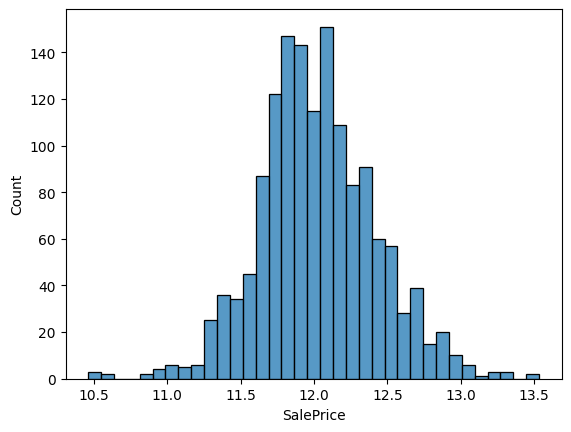

In [23]:
sns.histplot(y)

# Encoding Categorical Features

**Ordinal Encoder:**

* Purpose: Used for encoding categorical variables where the order or rank among the categories is meaningful.
* Encoding: Assigns a unique integer to each category, preserving the ordinal relationship.

Example: If the categories are ["Low", "Medium", "High"], Ordinal Encoder might map them to [0, 1, 2].
Use Case: Suitable when there is a clear order or hierarchy among categories.

**One-Hot Encoder:**

* Purpose: Used for encoding categorical variables without assuming any ordinal relationship among categories.
* Encoding: Creates binary columns for each category, indicating the presence (1) or absence (0) of that category.

Example: If the categories are ["Red", "Green", "Blue"], One-Hot Encoder creates three binary columns, one for each category.
Use Case: Appropriate when there is no inherent order among categories, and each category is independent.

**Considerations:**

* Use Ordinal Encoder when there is a clear order or ranking among categories.
* Use One-Hot Encoder when categories are nominal (no inherent order) or when you want to avoid introducing artificial ordinal relationships.

In [24]:
ordinal = ['LotShape' , 'MasVnrType' , 'ExterQual' ,'ExterCond','BsmtQual' , 'BsmtCond' ,'BsmtExposure','BsmtFinType1' ,'BsmtFinType2'
           ,'HeatingQC' , 'KitchenQual','FireplaceQu','GarageFinish','GarageQual' ,'GarageCond','PavedDrive','PoolQC']


categ = [['Reg' , 'IR1' , 'IR2' ,'IR3'],
        ['Missing' , 'BrkCmn' , 'BrkFace' , 'Stone'],
        ['Fa','TA','Gd','Ex'],
        ['Po' ,'Fa','TA','Gd','Ex'],
        ['No Basement' , 'Fa','TA','Gd','Ex'],
        ['No Basement' ,'Po',  'Fa','TA','Gd','Ex'],
        ['No Basement' , 'No' , 'Mn' , 'Av' , 'Gd'],
        ['No Basement' , 'Unf' , 'LwQ' , 'Rec' , 'BLQ' , 'ALQ' , 'GLQ'],
        ['No Basement' , 'Unf' , 'LwQ' , 'Rec' , 'BLQ' , 'ALQ' , 'GLQ'],
        ['Po' ,'Fa','TA','Gd','Ex'],
        ['Fa','TA','Gd','Ex'],
        ['NoFireplace' , 'Po' ,'Fa','TA','Gd','Ex'],
        ['No Garage' , 'Unf' , 'RFn' , 'Fin'],
        ['No Garage' ,'Po' ,'Fa','TA','Gd','Ex'],
        ['No Garage' ,'Po' ,'Fa','TA','Gd','Ex'],
        ['N' , 'P' , 'Y'],
        ['NoPool' ,'Fa','Gd','Ex']]



onehot = ['MSZoning' , 'Street'  , 'Neighborhood' , 'Condition1' , 'Condition2'  , 
          'HouseStyle' , 'RoofMatl' , 'Exterior1st', 'Exterior2nd','Foundation' 
           ,'CentralAir', 'Electrical'  ,'GarageType','SaleType','SaleCondition']

In [25]:
df1.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,Neighborhood,Condition1,Condition2,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,60,RL,4.174387,9.041922,Pave,Reg,CollgCr,Norm,Norm,2Story,7,5,2003,2003,CompShg,VinylSd,VinylSd,BrkFace,5.278115,Gd,TA,PConc,Gd,TA,No,GLQ,6.559615,Unf,0.0,5.010635,6.752270,Ex,Y,SBrkr,6.752270,6.749931,0,7.444249,1,0,2,1,3,1,Gd,8,0,NoFireplace,Attchd,2003.0,RFn,2,6.306275,TA,TA,Y,0.000000,4.110874,0.000000,0,0,0,NoPool,0.0,2,2008,WD,Normal
1,20,RL,4.382027,9.169518,Pave,Reg,Veenker,Feedr,Norm,1Story,6,8,1976,1976,CompShg,MetalSd,MetalSd,Missing,0.000000,TA,TA,CBlock,Gd,TA,Gd,ALQ,6.885510,Unf,0.0,5.648974,7.140453,Ex,Y,SBrkr,7.140453,0.000000,0,7.140453,0,1,2,0,3,1,TA,6,1,TA,Attchd,1976.0,RFn,2,6.131226,TA,TA,Y,5.697093,0.000000,0.000000,0,0,0,NoPool,0.0,5,2007,WD,Normal
2,60,RL,4.219508,9.328123,Pave,IR1,CollgCr,Norm,Norm,2Story,7,5,2001,2002,CompShg,VinylSd,VinylSd,BrkFace,5.087596,Gd,TA,PConc,Gd,TA,Mn,GLQ,6.186209,Unf,0.0,6.073045,6.824374,Ex,Y,SBrkr,6.824374,6.763885,0,7.487734,1,0,2,1,3,1,Gd,6,1,TA,Attchd,2001.0,RFn,2,6.410175,TA,TA,Y,0.000000,3.737670,0.000000,0,0,0,NoPool,0.0,9,2008,WD,Normal
3,70,RL,4.094345,9.164296,Pave,IR1,Crawfor,Norm,Norm,2Story,7,5,1915,1970,CompShg,Wd Sdng,Wd Shng,Missing,0.000000,TA,TA,BrkTil,TA,Gd,No,ALQ,5.375278,Unf,0.0,6.291569,6.628041,Gd,Y,SBrkr,6.867974,6.628041,0,7.448334,1,0,1,0,3,1,Gd,7,1,Gd,Detchd,1998.0,Unf,3,6.464588,TA,TA,Y,0.000000,3.555348,5.605802,0,0,0,NoPool,0.0,2,2006,WD,Abnorml
4,60,RL,4.430817,9.565214,Pave,IR1,NoRidge,Norm,Norm,2Story,8,5,2000,2000,CompShg,VinylSd,VinylSd,BrkFace,5.857933,Gd,TA,PConc,Gd,TA,Av,GLQ,6.484635,Unf,0.0,6.194405,7.043160,Ex,Y,SBrkr,7.043160,6.959399,0,7.695303,1,0,2,1,4,1,Gd,9,1,TA,Attchd,2000.0,RFn,3,6.728629,TA,TA,Y,5.257495,4.430817,0.000000,0,0,0,NoPool,0.0,12,2008,WD,Normal


# Performing One-Hot- Encoding 

The purpose of concatenating the DataFrames is to ensure that the one-hot encoding is applied consistently to both the training and test sets. This is important because the same categorical variables might have different unique values in the training and test sets.

In [26]:
ohe = OneHotEncoder()
full = pd.concat((df1 , test1))

In [27]:
full

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,Neighborhood,Condition1,Condition2,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,60,RL,4.174387,9.041922,Pave,Reg,CollgCr,Norm,Norm,2Story,7,5,2003,2003,CompShg,VinylSd,VinylSd,BrkFace,5.278115,Gd,TA,PConc,Gd,TA,No,GLQ,6.559615,Unf,0.0,5.010635,6.752270,Ex,Y,SBrkr,6.752270,6.749931,0,7.444249,1.0,0.0,2,1,3,1,Gd,8,0,NoFireplace,Attchd,2003.0,RFn,2.0,6.306275,TA,TA,Y,0.000000,4.110874,0.000000,0,0,0,NoPool,0.00000,2,2008,WD,Normal
1,20,RL,4.382027,9.169518,Pave,Reg,Veenker,Feedr,Norm,1Story,6,8,1976,1976,CompShg,MetalSd,MetalSd,Missing,0.000000,TA,TA,CBlock,Gd,TA,Gd,ALQ,6.885510,Unf,0.0,5.648974,7.140453,Ex,Y,SBrkr,7.140453,0.000000,0,7.140453,0.0,1.0,2,0,3,1,TA,6,1,TA,Attchd,1976.0,RFn,2.0,6.131226,TA,TA,Y,5.697093,0.000000,0.000000,0,0,0,NoPool,0.00000,5,2007,WD,Normal
2,60,RL,4.219508,9.328123,Pave,IR1,CollgCr,Norm,Norm,2Story,7,5,2001,2002,CompShg,VinylSd,VinylSd,BrkFace,5.087596,Gd,TA,PConc,Gd,TA,Mn,GLQ,6.186209,Unf,0.0,6.073045,6.824374,Ex,Y,SBrkr,6.824374,6.763885,0,7.487734,1.0,0.0,2,1,3,1,Gd,6,1,TA,Attchd,2001.0,RFn,2.0,6.410175,TA,TA,Y,0.000000,3.737670,0.000000,0,0,0,NoPool,0.00000,9,2008,WD,Normal
3,70,RL,4.094345,9.164296,Pave,IR1,Crawfor,Norm,Norm,2Story,7,5,1915,1970,CompShg,Wd Sdng,Wd Shng,Missing,0.000000,TA,TA,BrkTil,TA,Gd,No,ALQ,5.375278,Unf,0.0,6.291569,6.628041,Gd,Y,SBrkr,6.867974,6.628041,0,7.448334,1.0,0.0,1,0,3,1,Gd,7,1,Gd,Detchd,1998.0,Unf,3.0,6.464588,TA,TA,Y,0.000000,3.555348,5.605802,0,0,0,NoPool,0.00000,2,2006,WD,Abnorml
4,60,RL,4.430817,9.565214,Pave,IR1,NoRidge,Norm,Norm,2Story,8,5,2000,2000,CompShg,VinylSd,VinylSd,BrkFace,5.857933,Gd,TA,PConc,Gd,TA,Av,GLQ,6.484635,Unf,0.0,6.194405,7.043160,Ex,Y,SBrkr,7.043160,6.959399,0,7.695303,1.0,0.0,2,1,4,1,Gd,9,1,TA,Attchd,2000.0,RFn,3.0,6.728629,TA,TA,Y,5.257495,4.430817,0.000000,0,0,0,NoPool,0.00000,12,2008,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,160,RM,3.044522,7.568379,Pave,Reg,MeadowV,Norm,Norm,2Story,4,7,1970,1970,CompShg,CemntBd,CmentBd,Missing,0.000000,TA,TA,CBlock,TA,TA,No,Unf,0.000000,Unf,0.0,6.302619,6.302619,Gd,Y,SBrkr,6.302619,6.302619,0,6.995766,0.0,0.0,1,1,3,1,TA,5,0,NoFireplace,No Garage,0.0,No Garage,0.0,0.000000,No Garage,No Garage,Y,0.000000,0.000000,0.000000,0,0,0,NoPool,0.00000,6,2006,WD,Normal
1455,160,RM,3.044522,7.546446,Pave,Reg,MeadowV,Norm,Norm,2Story,4,5,1970,1970,CompShg,CemntBd,CmentBd,Missing,0.000000,TA,TA,CBlock,TA,TA,No,Rec,5.529429,Unf,0.0,5.683580,6.302619,TA,Y,SBrkr,6.302619,6.302619,0,6.995766,0.0,0.0,1,1,3,1,TA,6,0,NoFireplace,CarPort,1970.0,Unf,1.0,5.655992,TA,TA,Y,0.000000,3.178054,0.000000,0,0,0,NoPool,0.00000,4,2006,WD,Abnorml
1456,20,RL,5.075174,9.903488,Pave,Reg,Mitchel,Norm,Norm,1Story,5,7,1960,1996,CompShg,VinylSd,VinylSd,Missing,0.000000,TA,TA,CBlock,TA,TA,No,ALQ,7.109879,Unf,0.0,0.000000,7.109879,Ex,Y,SBrkr,7.109879,0.000000,0,7.109879,1.0,0.0,1,0,4,1,TA,7,1,TA,Detchd,1960.0,Unf,2.0,6.356108,TA,TA,Y,6.161207,0.000000,0.000000,0,0,0,NoPool,0.00000,9,2006,WD,Abnorml
1457,85,RL,4.127134,9.253496,Pave,Reg,Mitchel,Norm,Norm,SFoyer,5,5,1992,1992,CompShg,HdBoard,Wd Shng,Missing,0.000000,TA,TA,PConc,Gd,TA,Av,GLQ,5.820083,Unf,

In [28]:
ohe.fit(full[onehot])

OneHotEncoder()

In [29]:
'''This step transforms the specified categorical features (onehot) in the DataFrame df1 using the fitted 
OneHotEncoder (ohe). The result is a sparse matrix.
'''
encoded_data = ohe.transform(df1[onehot]).toarray()

In [30]:
#new feature names after one hot encoding
ohe.get_feature_names_out(onehot)

array(['MSZoning_C (all)', 'MSZoning_FV', 'MSZoning_RH', 'MSZoning_RL',
       'MSZoning_RM', 'Street_Grvl', 'Street_Pave',
       'Neighborhood_Blmngtn', 'Neighborhood_Blueste',
       'Neighborhood_BrDale', 'Neighborhood_BrkSide',
       'Neighborhood_ClearCr', 'Neighborhood_CollgCr',
       'Neighborhood_Crawfor', 'Neighborhood_Edwards',
       'Neighborhood_Gilbert', 'Neighborhood_IDOTRR',
       'Neighborhood_MeadowV', 'Neighborhood_Mitchel',
       'Neighborhood_NAmes', 'Neighborhood_NPkVill',
       'Neighborhood_NWAmes', 'Neighborhood_NoRidge',
       'Neighborhood_NridgHt', 'Neighborhood_OldTown',
       'Neighborhood_SWISU', 'Neighborhood_Sawyer',
       'Neighborhood_SawyerW', 'Neighborhood_Somerst',
       'Neighborhood_StoneBr', 'Neighborhood_Timber',
       'Neighborhood_Veenker', 'Condition1_Artery', 'Condition1_Feedr',
       'Condition1_Norm', 'Condition1_PosA', 'Condition1_PosN',
       'Condition1_RRAe', 'Condition1_RRAn', 'Condition1_RRNe',
       'Condition1_RRNn',

In [31]:
#Create DataFrame with Feature Names:
onehot_df = pd.DataFrame(encoded_data, columns=ohe.get_feature_names_out(onehot))

In [32]:
# Concatenate DataFrames and Drop Original Columns:

'''This step concatenates the original DataFrame df1 with the new one-hot encoded DataFrame (onehot_df) 
along the columns (axis=1). Then, it drops the original categorical columns specified in the onehot list, 
as they have been replaced with their one-hot encoded counterparts.'''

df1 = pd.concat([df1, onehot_df], axis=1).drop(columns=onehot)

In [33]:
df1.head()

,MSSubClass,LotFrontage,LotArea,LotShape,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrType,MasVnrArea,ExterQual,ExterCond,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,HeatingQC,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Fireplaces,FireplaceQu,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,MiscVal,MoSold,YrSold,MSZoning_C (all),MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,Street_Grvl,Street_Pave,Neighborhood_Blmngtn,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,Condition1_Artery,Condition1_Feedr,Condition1_Norm,Condition1_PosA,Condition1_PosN,Condition1_RRAe,Condition1_RRAn,Condition1_RRNe,Condition1_RRNn,Condition2_Artery,Condition2_Feedr,Condition2_Norm,Condition2_PosA,Condition2_PosN,Condition2_RRAe,Condition2_RRAn,Condition2_RRNn,HouseStyle_1.5Fin,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,RoofMatl_ClyTile,RoofMatl_CompShg,RoofMatl_Membran,RoofMatl_Metal,RoofMatl_Roll,RoofMatl_Tar&Grv,RoofMatl_WdShake,RoofMatl_WdShngl,Exterior1st_AsbShng,Exterior1st_AsphShn,Exterior1st_BrkComm,Exterior1st_BrkFace,Exterior1st_CBlock,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_ImStucc,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stone,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,Exterior2nd_AsbShng,Exterior2nd_AsphShn,Exterior2nd_Brk Cmn,Exterior2nd_BrkFace,Exterior2nd_CBlock,Exterior2nd_CmentBd,Exterior2nd_HdBoard,Exterior2nd_ImStucc,Exterior2nd_MetalSd,Exterior2nd_Other,Exterior2nd_Plywood,Exterior2nd_Stone,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,Foundation_BrkTil,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,CentralAir_N,CentralAir_Y,Electrical_FuseA,Electrical_FuseF,Electrical_FuseP,Electrical_Missing,Electrical_Mix,Electrical_SBrkr,GarageType_2Types,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageType_No Garage,SaleType_COD,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,60,4.174387,9.041922,Reg,7,5,2003,2003,BrkFace,5.278115,Gd,TA,Gd,TA,No,GLQ,6.559615,Unf,0.0,5.010635,6.752270,Ex,6.752270,6.749931,0,7.444249,1,0,2,1,3,1,Gd,8,0,NoFireplace,2003.0,RFn,2,6.306275,TA,TA,Y,0.000000,4.110874,0.000000,0,0,0,NoPool,0.0,2,2008,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
1,20,4.382027,9.169518,Reg,6,8,1976,1976,Missing,0.000000,TA,TA,Gd,TA,Gd,ALQ,6.885510,Unf,0.0,5.648974,7.140453,Ex,7.140453,0.000000,0,7.140453,0,1,2,0,3,1,TA,6,1,TA,1976.0,RFn,2,6.131226,TA,TA,Y,5.697093,0.000000,0.000000,0,0,0,NoPool,0.0,5,2007,0.0,0.0,0.0,1

In [34]:
df1.shape

(1460, 185)

In [35]:
#Performing similar steps for test set

encoded_data = ohe.transform(test1[onehot]).toarray()
onehot_df = pd.DataFrame(encoded_data, columns=ohe.get_feature_names_out(onehot))
test1 = pd.concat([test1, onehot_df], axis=1).drop(columns=onehot)

In [36]:
test1.shape

(1459, 185)

# Performing Ordinal Encoding

In [37]:
'''The purpose of this code is to initialize and fit an ordinal encoder (oe) to the ordinal features 
(ordinal) in the DataFrame full. The categories parameter is crucial for ordinal encoding, as it defines 
the order of the categories for each ordinal feature.
'''

oe = OrdinalEncoder(categories=categ)
oe.fit(full[ordinal])

OrdinalEncoder(categories=[['Reg', 'IR1', 'IR2', 'IR3'],
                           ['Missing', 'BrkCmn', 'BrkFace', 'Stone'],
                           ['Fa', 'TA', 'Gd', 'Ex'],
                           ['Po', 'Fa', 'TA', 'Gd', 'Ex'],
                           ['No Basement', 'Fa', 'TA', 'Gd', 'Ex'],
                           ['No Basement', 'Po', 'Fa', 'TA', 'Gd', 'Ex'],
                           ['No Basement', 'No', 'Mn', 'Av', 'Gd'],
                           ['No Basement', 'Unf', 'LwQ', 'Rec', 'BLQ', 'ALQ',
                            'GLQ'],
                           ['No Basement', 'Unf', 'LwQ', 'Rec', 'BLQ', 'ALQ',
                            'GLQ'],
                           ['Po', 'Fa', 'TA', 'Gd', 'Ex'],
                           ['Fa', 'TA', 'Gd', 'Ex'],
                           ['NoFireplace', 'Po', 'Fa', 'TA', 'Gd', 'Ex'],
                           ['No Garage', 'Unf', 'RFn', 'Fin'],
                           ['No Garage', 'Po', 'Fa', 'TA', 'Gd', 'Ex'],
                           ['No Garage', 'Po', 'Fa', 'TA', 'Gd', 'Ex'],
                           ['N', 'P', 'Y'], ['NoPool', 'Fa', 'Gd', 'Ex']])

In [38]:
#Ordinal Encoding for Train set
encoded_data2 = oe.transform(df1[ordinal])
ordinal_df = pd.DataFrame(encoded_data2, columns=oe.get_feature_names_out(ordinal))
df1 = df1.drop(columns=ordinal)
df1 = pd.concat([df1, ordinal_df], axis=1)

In [39]:
df1.shape

(1460, 185)

In [40]:
#Ordinal Encoding for Test Set
encoded_data2 = oe.transform(test1[ordinal])
ordinal_df = pd.DataFrame(encoded_data2, columns=oe.get_feature_names_out(ordinal))
test1 = test1.drop(columns=ordinal)
test1 = pd.concat([test1, ordinal_df], axis=1)

In [41]:
test1.shape

(1459, 185)

In [42]:
test1.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,MSZoning_C (all),MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,Street_Grvl,Street_Pave,Neighborhood_Blmngtn,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,Condition1_Artery,Condition1_Feedr,Condition1_Norm,Condition1_PosA,Condition1_PosN,Condition1_RRAe,Condition1_RRAn,Condition1_RRNe,Condition1_RRNn,Condition2_Artery,Condition2_Feedr,Condition2_Norm,Condition2_PosA,Condition2_PosN,Condition2_RRAe,Condition2_RRAn,Condition2_RRNn,HouseStyle_1.5Fin,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,RoofMatl_ClyTile,RoofMatl_CompShg,RoofMatl_Membran,RoofMatl_Metal,RoofMatl_Roll,RoofMatl_Tar&Grv,RoofMatl_WdShake,RoofMatl_WdShngl,Exterior1st_AsbShng,Exterior1st_AsphShn,Exterior1st_BrkComm,Exterior1st_BrkFace,Exterior1st_CBlock,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_ImStucc,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stone,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,Exterior2nd_AsbShng,Exterior2nd_AsphShn,Exterior2nd_Brk Cmn,Exterior2nd_BrkFace,Exterior2nd_CBlock,Exterior2nd_CmentBd,Exterior2nd_HdBoard,Exterior2nd_ImStucc,Exterior2nd_MetalSd,Exterior2nd_Other,Exterior2nd_Plywood,Exterior2nd_Stone,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,Foundation_BrkTil,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,CentralAir_N,CentralAir_Y,Electrical_FuseA,Electrical_FuseF,Electrical_FuseP,Electrical_Missing,Electrical_Mix,Electrical_SBrkr,GarageType_2Types,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageType_No Garage,SaleType_COD,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial,LotShape,MasVnrType,ExterQual,ExterCond,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,HeatingQC,KitchenQual,FireplaceQu,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC
0,20,4.382027,9.360655,5,6,1961,1961,0.000000,6.148468,4.969813,5.598422,6.782192,6.797940,0.000000,0,6.797940,0.0,0.0,1,0,2,1,5,0,1961.0,1.0,6.593045,4.941642,0.000000,0.0,0,120,0,0.000000,6,2010,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,2.0,2.0,3.0,1.0,3.0,2.0,2.0,1.0,0.0,1.0,3.0,3.0,2.0,0.0
1,20,4.394449,9.565704,6,6,1958,1958,4.682131,6.827629,0.000000,6.006353,7.192182,7.192182,0.000000,0,7.192182,0.0,0.0,1,1,3,1,6,0,1958.0,1.0,5.743003,5.973810,3.583519,0.0,0,0,0,9.433484,6,2010,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,

In [43]:
df1.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,MSZoning_C (all),MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,Street_Grvl,Street_Pave,Neighborhood_Blmngtn,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,Condition1_Artery,Condition1_Feedr,Condition1_Norm,Condition1_PosA,Condition1_PosN,Condition1_RRAe,Condition1_RRAn,Condition1_RRNe,Condition1_RRNn,Condition2_Artery,Condition2_Feedr,Condition2_Norm,Condition2_PosA,Condition2_PosN,Condition2_RRAe,Condition2_RRAn,Condition2_RRNn,HouseStyle_1.5Fin,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,RoofMatl_ClyTile,RoofMatl_CompShg,RoofMatl_Membran,RoofMatl_Metal,RoofMatl_Roll,RoofMatl_Tar&Grv,RoofMatl_WdShake,RoofMatl_WdShngl,Exterior1st_AsbShng,Exterior1st_AsphShn,Exterior1st_BrkComm,Exterior1st_BrkFace,Exterior1st_CBlock,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_ImStucc,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stone,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,Exterior2nd_AsbShng,Exterior2nd_AsphShn,Exterior2nd_Brk Cmn,Exterior2nd_BrkFace,Exterior2nd_CBlock,Exterior2nd_CmentBd,Exterior2nd_HdBoard,Exterior2nd_ImStucc,Exterior2nd_MetalSd,Exterior2nd_Other,Exterior2nd_Plywood,Exterior2nd_Stone,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,Foundation_BrkTil,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,CentralAir_N,CentralAir_Y,Electrical_FuseA,Electrical_FuseF,Electrical_FuseP,Electrical_Missing,Electrical_Mix,Electrical_SBrkr,GarageType_2Types,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageType_No Garage,SaleType_COD,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial,LotShape,MasVnrType,ExterQual,ExterCond,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,HeatingQC,KitchenQual,FireplaceQu,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC
0,60,4.174387,9.041922,7,5,2003,2003,5.278115,6.559615,0.0,5.010635,6.752270,6.752270,6.749931,0,7.444249,1,0,2,1,3,1,8,0,2003.0,2,6.306275,0.000000,4.110874,0.000000,0,0,0,0.0,2,2008,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,2.0,2.0,2.0,3.0,3.0,1.0,6.0,1.0,4.0,2.0,0.0,2.0,3.0,3.0,2.0,0.0
1,20,4.382027,9.169518,6,8,1976,1976,0.000000,6.885510,0.0,5.648974,7.140453,7.140453,0.000000,0,7.140453,0,1,2,0,3,1,6,1,1976.0,2,6.131226,5.697093,0.000000,0.000000,0,0,0,0.0,5,2007,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,

In [44]:
#Preparing and X and y for training
X = df1.values
y = np.log(df['SalePrice']).values

In [45]:
kf = KFold(n_splits=5, shuffle=True, random_state=42)

for train_index, test_index in kf.split(X):
    x_train, x_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]

In [46]:
from sklearn.model_selection import KFold, cross_val_score
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from xgboost import XGBRegressor
from sklearn.svm import SVR
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
import pandas as pd

# Assume X and y are your feature and target datasets

# Define models
models = {
    'Linear Regression': LinearRegression(),
    'Ridge Regression': Ridge(),
    'Lasso Regression': Lasso(),
    'Decision Tree': DecisionTreeRegressor(),
    'Random Forest': RandomForestRegressor(),
    'Gradient Boosting': GradientBoostingRegressor(),
    'XGBoost': XGBRegressor(),
    'Support Vector Machine': SVR()
}

# Initialize KFold cross-validation
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# Create a DataFrame to store MSE results
mse_results = pd.DataFrame(index=models.keys(), columns=['MSE'])

# Iterate over models
for model_name, model in models.items():
    # Create a pipeline with standard scaler (if needed) and the current model
    if 'StandardScaler' in str(model):
        pipeline = make_pipeline(StandardScaler(), model)
    else:
        pipeline = make_pipeline(model)

    # Calculate cross-validated MSE using KFold
    mse_scores = -cross_val_score(pipeline, X, y, scoring='neg_mean_squared_error', cv=kf)

    # Take the mean of MSE scores
    average_mse = mse_scores.mean()

    # Store the result in the DataFrame
    mse_results.at[model_name, 'MSE'] = average_mse

# Display the MSE results in tabular format
print(mse_results)


                             MSE
Linear Regression       0.018212
Ridge Regression        0.017363
Lasso Regression        0.086829
Decision Tree           0.044822
Random Forest           0.021166
Gradient Boosting       0.018459
XGBoost                 0.020441
Support Vector Machine  0.111981


In [47]:
lr_model=Ridge()
lr_model.fit(X,y)

Ridge()

In [48]:
x_test=test1.values

In [49]:
Y_pred=np.exp(lr_model.predict(x_test))

In [50]:
df_test['SalePrice'] = Y_pred

In [51]:
df_test.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Feedr,Norm,1Fam,1Story,5,6,1961,1961,Gable,CompShg,VinylSd,VinylSd,NaN,0.0,TA,TA,CBlock,TA,TA,No,Rec,468.0,LwQ,144.0,270.0,882.0,GasA,TA,Y,SBrkr,896,0,0,896,0.0,0.0,1,0,2,1,TA,5,Typ,0,NaN,Attchd,1961.0,Unf,1.0,730.0,TA,TA,Y,140,0,0,0,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal,117034.275570
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,6,6,1958,1958,Hip,CompShg,Wd Sdng,Wd Sdng,BrkFace,108.0,TA,TA,CBlock,TA,TA,No,ALQ,923.0,Unf,0.0,406.0,1329.0,GasA,TA,Y,SBrkr,1329,0,0,1329,0.0,0.0,1,1,3,1,Gd,6,Typ,0,NaN,Attchd,1958.0,Unf,1.0,312.0,TA,TA,Y,393,36,0,0,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal,150244.461917
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,5,5,1997,1998,Gable,CompShg,VinylSd,VinylSd,NaN,0.0,TA,TA,PConc,Gd,TA,No,GLQ,791.0,Unf,0.0,137.0,928.0,GasA,Gd,Y,SBrkr,928,701,0,1629,0.0,0.0,2,1,3,1,TA,6,Typ,1,TA,Attchd,1997.0,Fin,2.0,482.0,TA,TA,Y,212,34,0,0,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal,180507.904907
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,6,6,1998,1998,Gable,CompShg,VinylSd,VinylSd,BrkFace,20.0,TA,TA,PConc,TA,TA,No,GLQ,602.0,Unf,0.0,324.0,926.0,GasA,Ex,Y,SBrkr,926,678,0,1604,0.0,0.0,2,1,3,1,Gd,7,Typ,1,Gd,Attchd,1998.0,Fin,2.0,470.0,TA,TA,Y,360,36,0,0,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal,197719.719114
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,Inside,Gtl,StoneBr,Norm,Norm,TwnhsE,1Story,8,5,1992,1992,Gable,CompShg,HdBoard,HdBoard,NaN,0.0,Gd,TA,PConc,Gd,TA,No,ALQ,263.0,Unf,0.0,1017.0,1280.0,GasA,Ex,Y,SBrkr,1280,0,0,1280,0.0,0.0,2,0,2,1,Gd,5,Typ,0,NaN,Attchd,1992.0,RFn,2.0,506.0,TA,TA,Y,0,82,0,0,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal,204805.589955


In [52]:
df_test[['Id','SalePrice']].to_csv('sub.csv',index=False)